# Cian flats EDA

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.ticker as mticker


import seaborn as sns

# USE THIS STYLE
# plt.style.use('https://github.com/dhaitz/matplotlib-stylesheets/raw/master/pitayasmoothie-light.mplstyle')
# 
# OR THIS STYLE
import aquarel

import warnings

warnings.filterwarnings("ignore")

theme = aquarel.load_theme("arctic_light")
theme.set_font(family="serif")
theme.apply()

# Сделаем автоподгрузку всех изменений при перепрогонке ячейки
%load_ext autoreload
%autoreload 2

%matplotlib inline

In [2]:
custom_pallete = {
    "red": "#BF616A",
    "orange": "#D08770",
    "yellow": "#EBCB8B",
    "green": "#A3BE8C",
    "purple": "#B48EAD",
    "light_green": "#8FBCBB",
    "light_gray_blue": "#88C0D0",
    "light_blue": "#81A1C1",
    "blue": "#5E81AC",
}

## Load data

In [3]:
df_cian = pd.read_csv("./data/cian_houses_dataset.csv")
df_cian.head()

price                                           location    geo_lat  \
0  18374400  Москва, СВАО, р-н Марьина роща, Тэйт жилой ком...  55.802530   
1  49954800  Москва, ЦАО, р-н Таганский, Славянская пл., 2/5с1  55.752541   
2   8170000  Москва, НАО (Новомосковский), Филимонковское п...  55.552637   
3  20206500  Москва, СВАО, р-н Останкинский, ул. Годовикова...  55.810466   
4  17119620  Москва, ЮАО, р-н Даниловский, Автозаводская ул...  55.706597   

     geo_lng         metro  floor  floor_count  square living_square  \
0  37.620945  Марьина Роща     34           49   38.28          11.8   
1  37.635727         Китай      7            8   53.20       unknown   
2  37.337172   Филатов Луг      2            5   31.00       unknown   
3  37.624247  Алексеевская     34           37   28.50          21.4   
4  37.632285      Тульская      6           20   38.82          10.6   

  kitchen_square  ... ceiling_height      view           house_type  \
0        unknown  ...           3.12   unknown  Монолитно-кирпичный   
1           24.1  ...            3.0   unknown  Монолитно-кирпичный   
2           10.0  ...            3.0   Во двор              unknown   
3        unknown  ...           3.01  На улицу  Монолитно-кирпичный   
4           18.6  ...           2.85   Во двор           Монолитный   

          heating breakdown  parking       accomodation_type   author  \
0         unknown   unknown  unknown             Новостройка  КОРТРОС   
1         unknown   unknown  unknown  Вторичка / Апартаменты  unknown   
2  Нет информации       Нет  unknown                Вторичка  unknown   
3         unknown   unknown  unknown             Новостройка  КОРТРОС   
4         unknown   unknown  unknown             Новостройка  unknown   

                                        url room_count  
0  https://www.cian.ru/sale/flat/302789697/          1  
1  https://www.cian.ru/sale/flat/301496936/          1  
2  https://www.cian.ru/sale/flat/303552909/          1  
3  https://www.cian.ru/sale/flat/306568424/          1  
4  https://www.cian.ru/sale/flat/305679800/          1  

[5 rows x 22 columns]

In [4]:
df_cian.shape

(8053, 22)

Разделим на численные и категориальные фитчи

In [5]:
numerical_features = [f for f in df_cian.columns if df_cian.dtypes[f] != "object"]
categorical_features = [f for f in df_cian.columns if df_cian.dtypes[f] == "object"]

In [6]:
numerical_features

['price', 'geo_lat', 'geo_lng', 'floor', 'floor_count', 'square', 'room_count']

In [7]:
df_cian["price"].describe()

count    8.053000e+03
mean     1.169362e+08
std      2.377114e+08
min      9.000000e+05
25%      1.496352e+07
50%      3.938630e+07
75%      1.150000e+08
max      3.592900e+09
Name: price, dtype: float64

## Цены на квартиры

### Посмотрим на гистограмму распределения цен

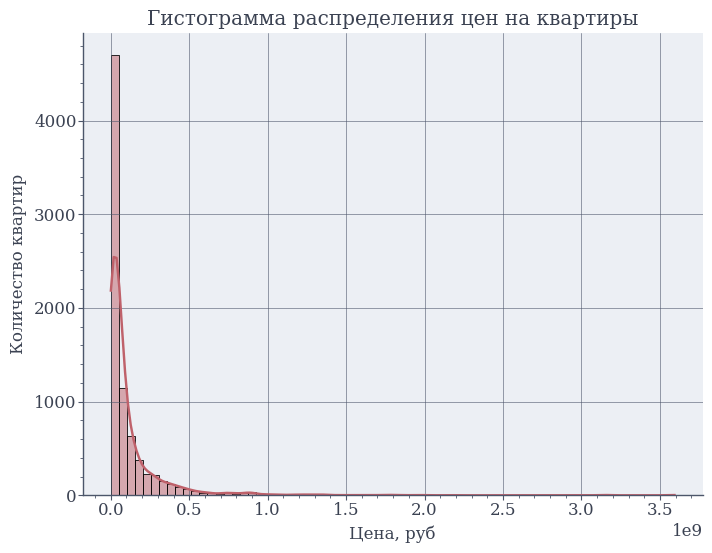

In [8]:
fig, ax = plt.subplots(figsize=(8, 6))

sns.histplot(
    data=df_cian["price"],
    bins=70,
    color=custom_pallete["red"],
    kde=True,
    ax=ax,
)

ax.set_title("Гистограмма распределения цен на квартиры")
ax.set_xlabel("Цена, руб")
ax.set_ylabel("Количество квартир")

plt.show()

Распределение цен на квартиры похоже на логнормальное распределение. 

Источники свидетельстьвующие о возможной верности данной гипотезы:
- https://www.geeksforgeeks.org/lognormal-distribution-in-business-statistics/
- https://fin-accounting.ru/cfa/l1/quantitative/cfa-lognormal-probability-distribution

Все-таки цена на квартиру зависит от многих факторов, самый сильный, предположительно (после посмотрим на матрицу корреляций), &mdash; это площадь. Квартиру с большей площадью может позволить себе более обеспеченный человек, а распределение доходов в обществе, которое описывается логнормальным распределением.

### Построим boxplot (градусник) распределения цен

Выбрана логарифмическая шкала, т.к. она более удобна для отображения результатов.

In [9]:
import babel.numbers

def ru_currency_format(currency):
    return babel.numbers.format_compact_currency(
        currency,
        "RUB",
        locale="ru_RU",
    )

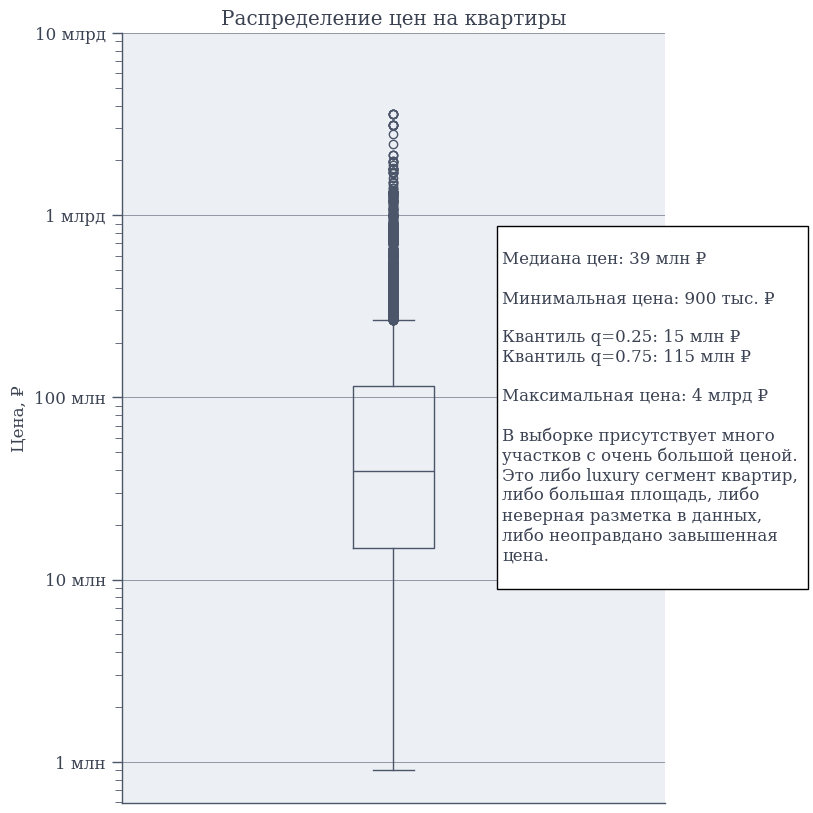

In [10]:
prices_description = df_cian["price"].describe(include="all")

text_for_boxplot = f"""
Медиана цен: {ru_currency_format(prices_description["50%"])}

Минимальная цена: {ru_currency_format(prices_description["min"])}

Квантиль q=0.25: {ru_currency_format(prices_description["25%"])}
Квантиль q=0.75: {ru_currency_format(prices_description["75%"])}

Максимальная цена: {ru_currency_format(prices_description["max"])}

В выборке присутствует много 
участков с очень большой ценой. 
Это либо luxury сегмент квартир, 
либо большая площадь, либо 
неверная разметка в данных,
либо неоправдано завышенная
цена.
"""

plot_info = {
    "title": "Распределение цен на квартиры",
    "xlabel": "",
    "ylabel": "Цена, ₽",
    "text": text_for_boxplot,
}

fig, ax = plt.subplots(figsize=(7, 10))

ax.boxplot(df_cian["price"])

ax.set(
    title=plot_info["title"],
    ylabel=plot_info["ylabel"],
)


ax.annotate(
    plot_info["text"],
    xy=(1.2, 10e6),
    bbox=dict(boxstyle="square", fc="w", alpha=1),
    fontsize=12,
)

ax.xaxis.set_major_locator(mticker.NullLocator())

ax.set_yscale("log")
ax.yaxis.set_major_locator(mticker.LogLocator(base=10, numticks=10))
ax.yaxis.set_major_formatter(
    mticker.FuncFormatter(lambda x, pos: str(ru_currency_format(x))[:-1])
)
ax.tick_params(axis="y", length=7, width=1, which="major")
ax.tick_params(axis="y", length=5, which="minor")
ax.set_ylim(0, 1e10)

# pdf.savefig(bbox_inches = 'tight')
plt.show()

### Отдельно построим гистограммы распределения цен на квартиры в зависимости от количества комнат.

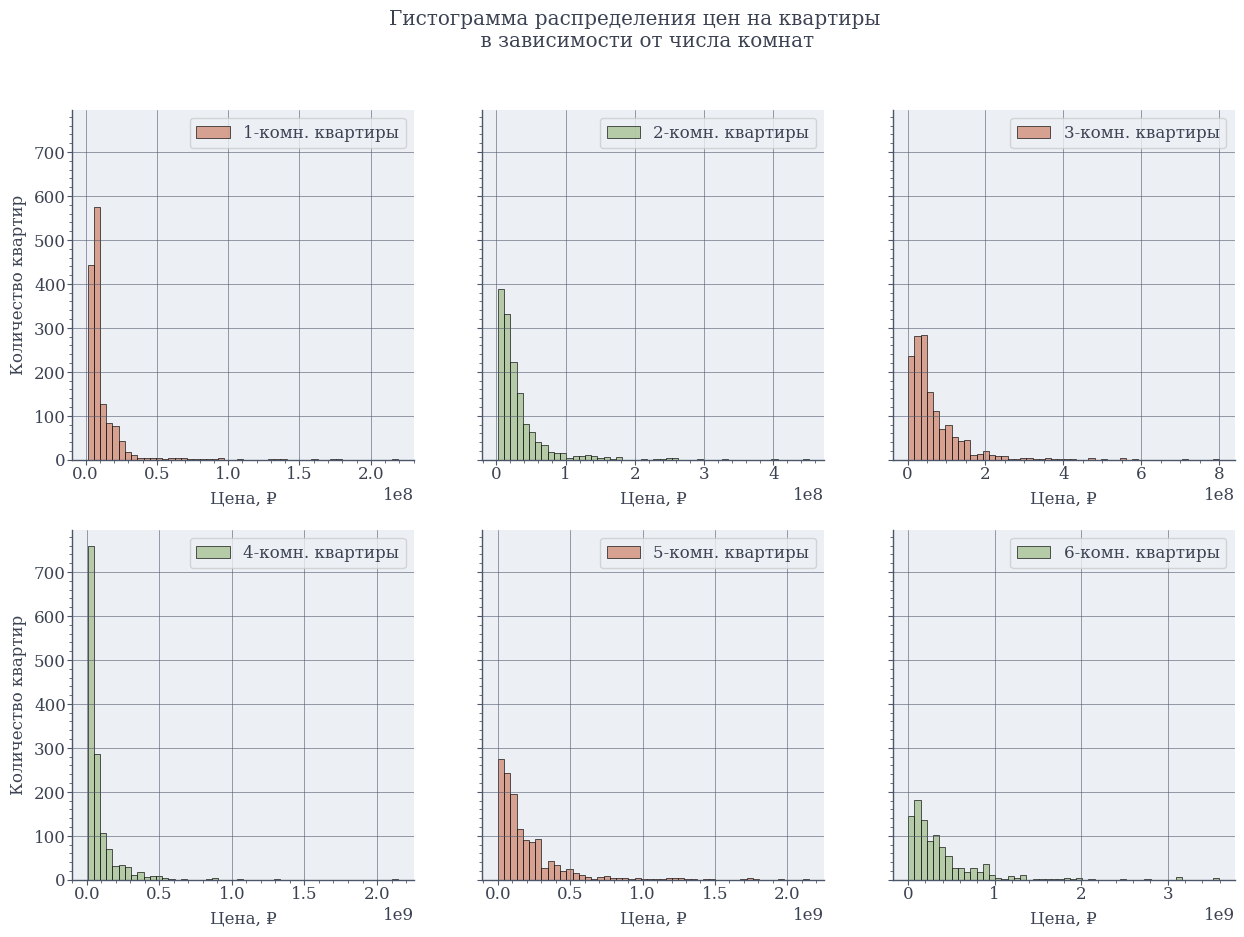

In [11]:
fig, ax = plt.subplots(
    nrows=2,
    ncols=3,
    figsize=(15, 10),
    sharey=True,
)

fig.suptitle(
    """Гистограмма распределения цен на квартиры
    в зависимости от числа комнат"""
)


for i in range(2):
    for j in range(3):
        sns.histplot(
            data=df_cian[df_cian["room_count"] == 3 * (i) + (j + 1)]["price"],
            bins=50,
            color=(
                custom_pallete["green"]
                if (3 * (i) + (j + 1)) % 2 == 0
                else custom_pallete["orange"]
            ),
            # kde=True,
            ax=ax[i][j],
            label=f"{3 * (i) + (j + 1)}-комн. квартиры",
        )
        ax[i][j].legend()
        ax[i][j].set_ylabel("Количество квартир")
        ax[i][j].set_xlabel("Цена, ₽")

plt.show()

### Посмотрим на матрицу корреляций

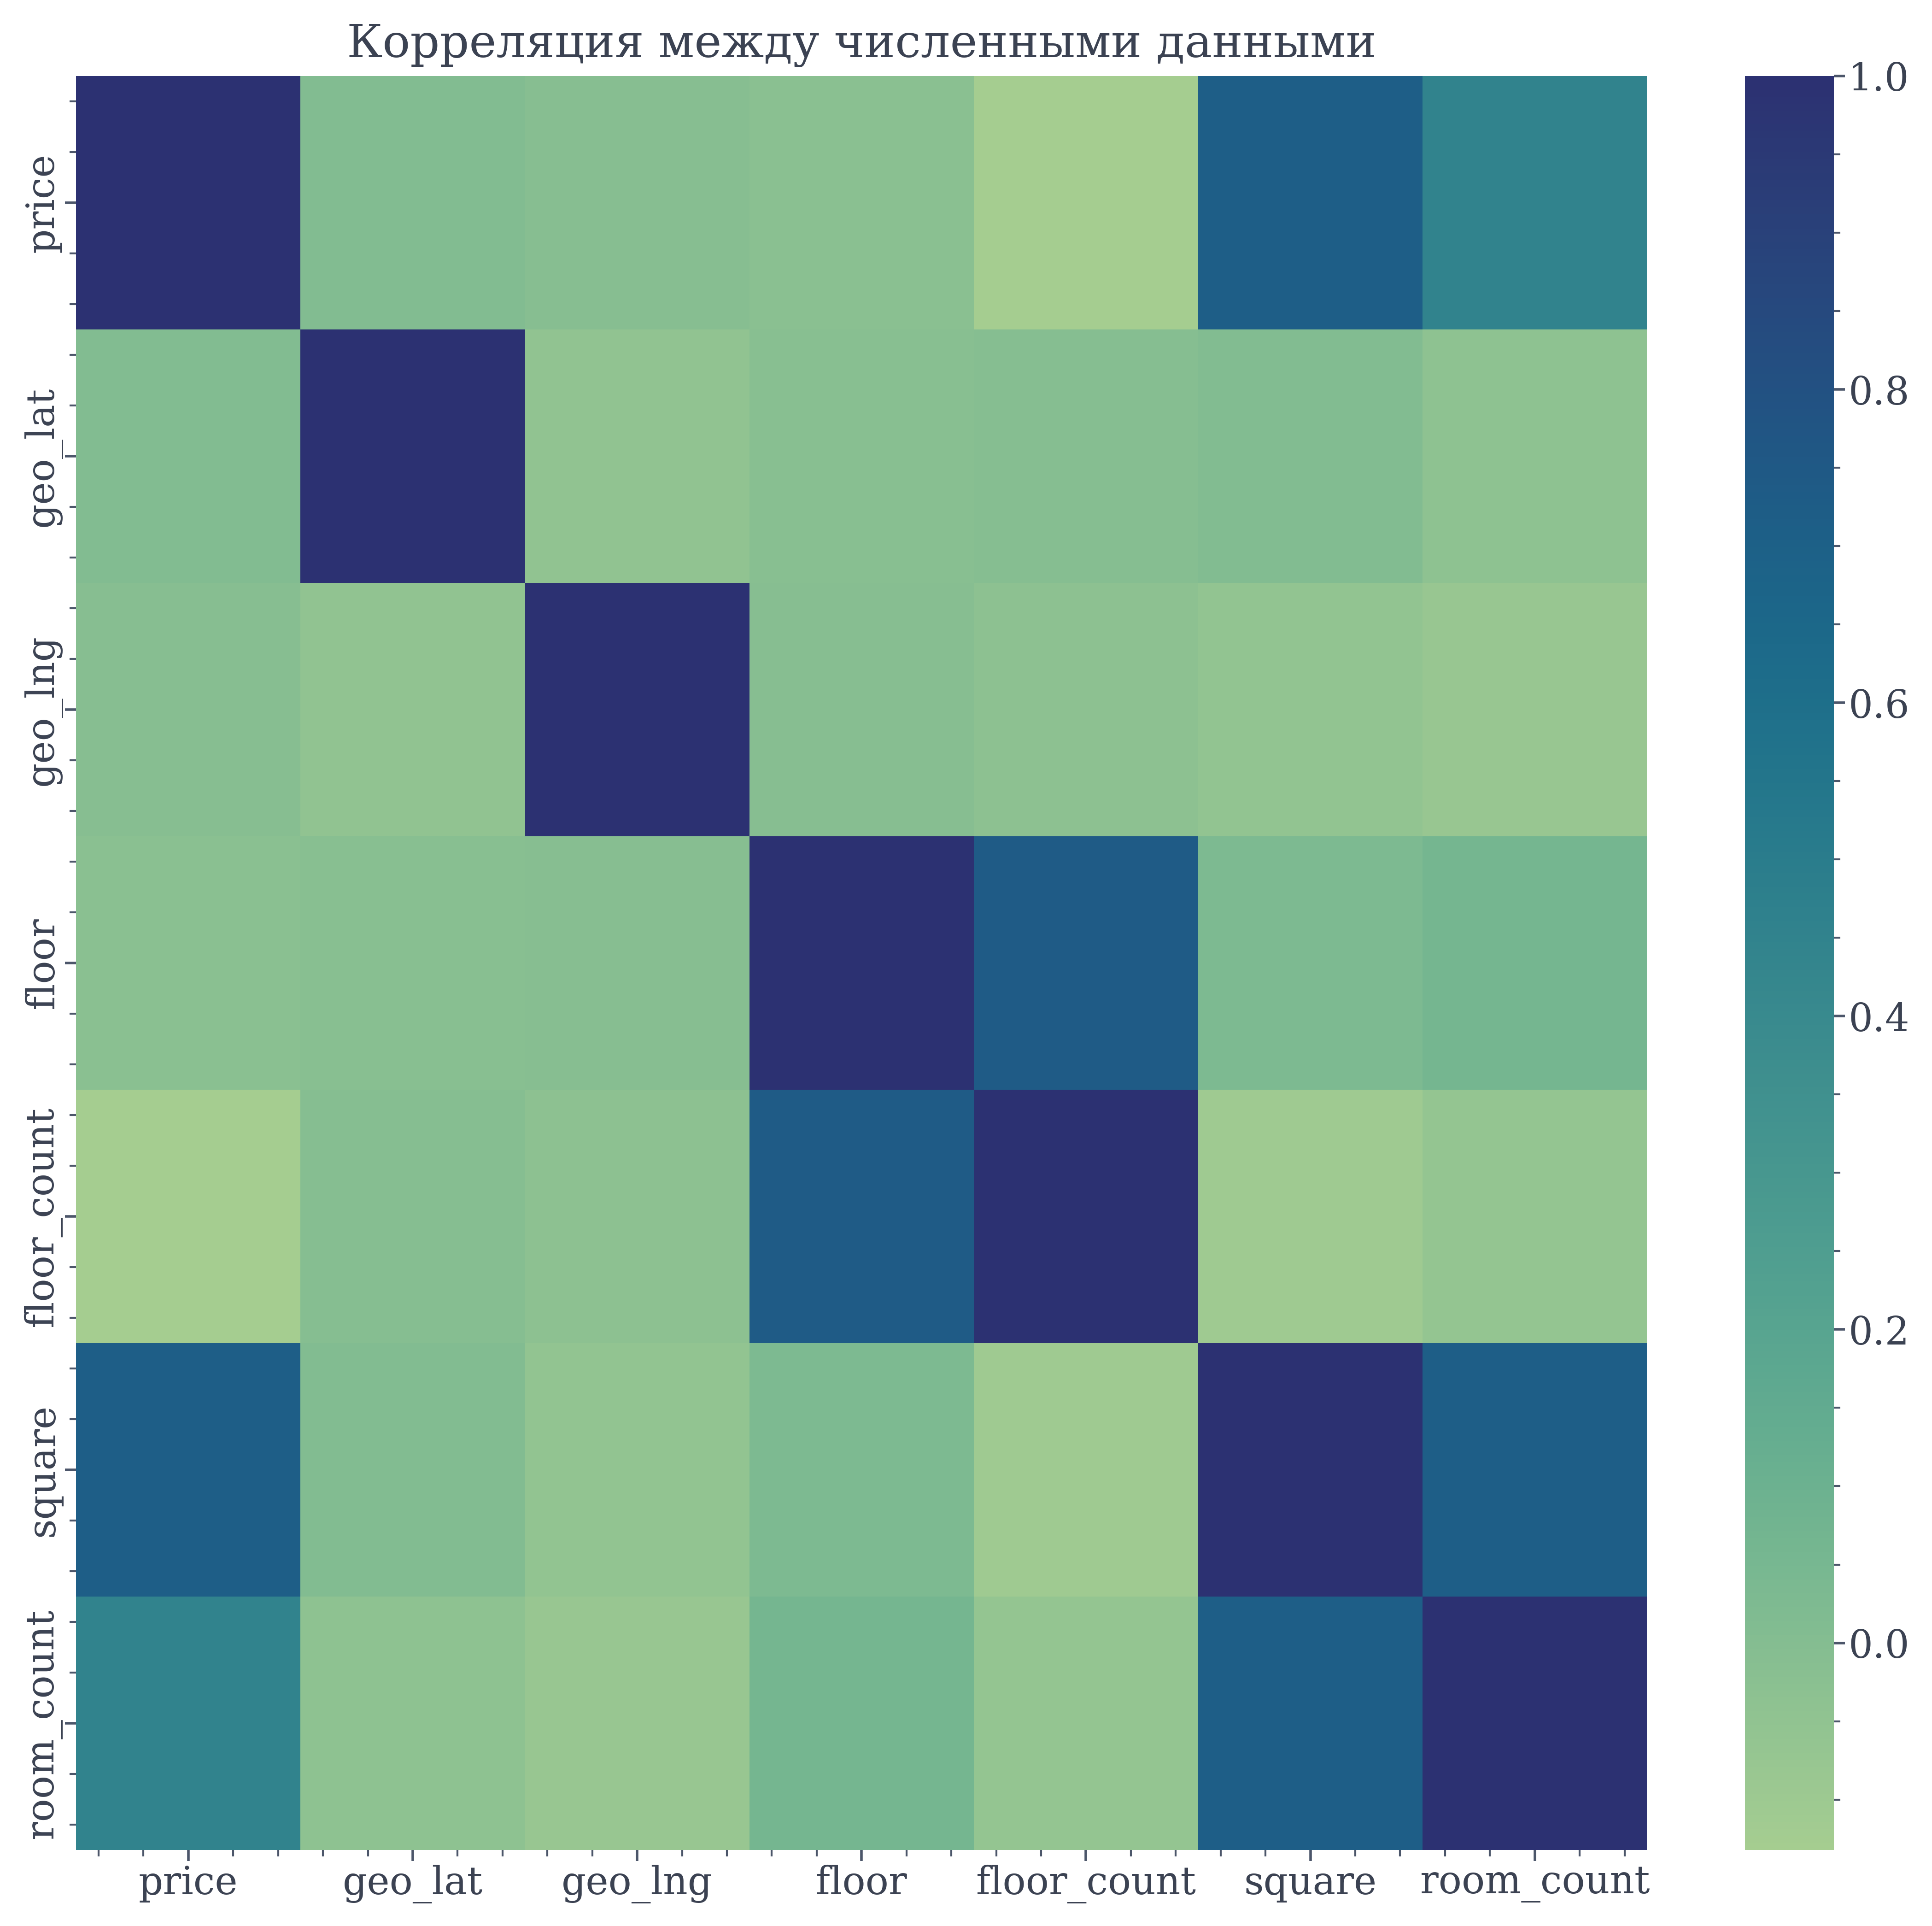

In [12]:
corr = df_cian[numerical_features].corr()

plt.figure(figsize=(11, 10), dpi=500)

sns.heatmap(corr, cmap="crest")

plt.title("Корреляция между численными данными")
plt.grid(False)

# pdf.savefig(bbox_inches = 'tight')
plt.show()

Как и предполагалось, цена на квартиру сильнее всего коррелирует с площадью

In [13]:
# mticker.Locator.MAXTICKS = 2000

# fig, ax = plt.subplots(
#     figsize=(20, 110),
# )

# sns.barplot(
#     data=df_cian["metro"].value_counts().reset_index(),
#     x="count",
#     y="metro",
#     ax=ax,
# )

# ax.set_title("Количество квартир рядом со станцией метро")

# plt.show()

## Площади квартир

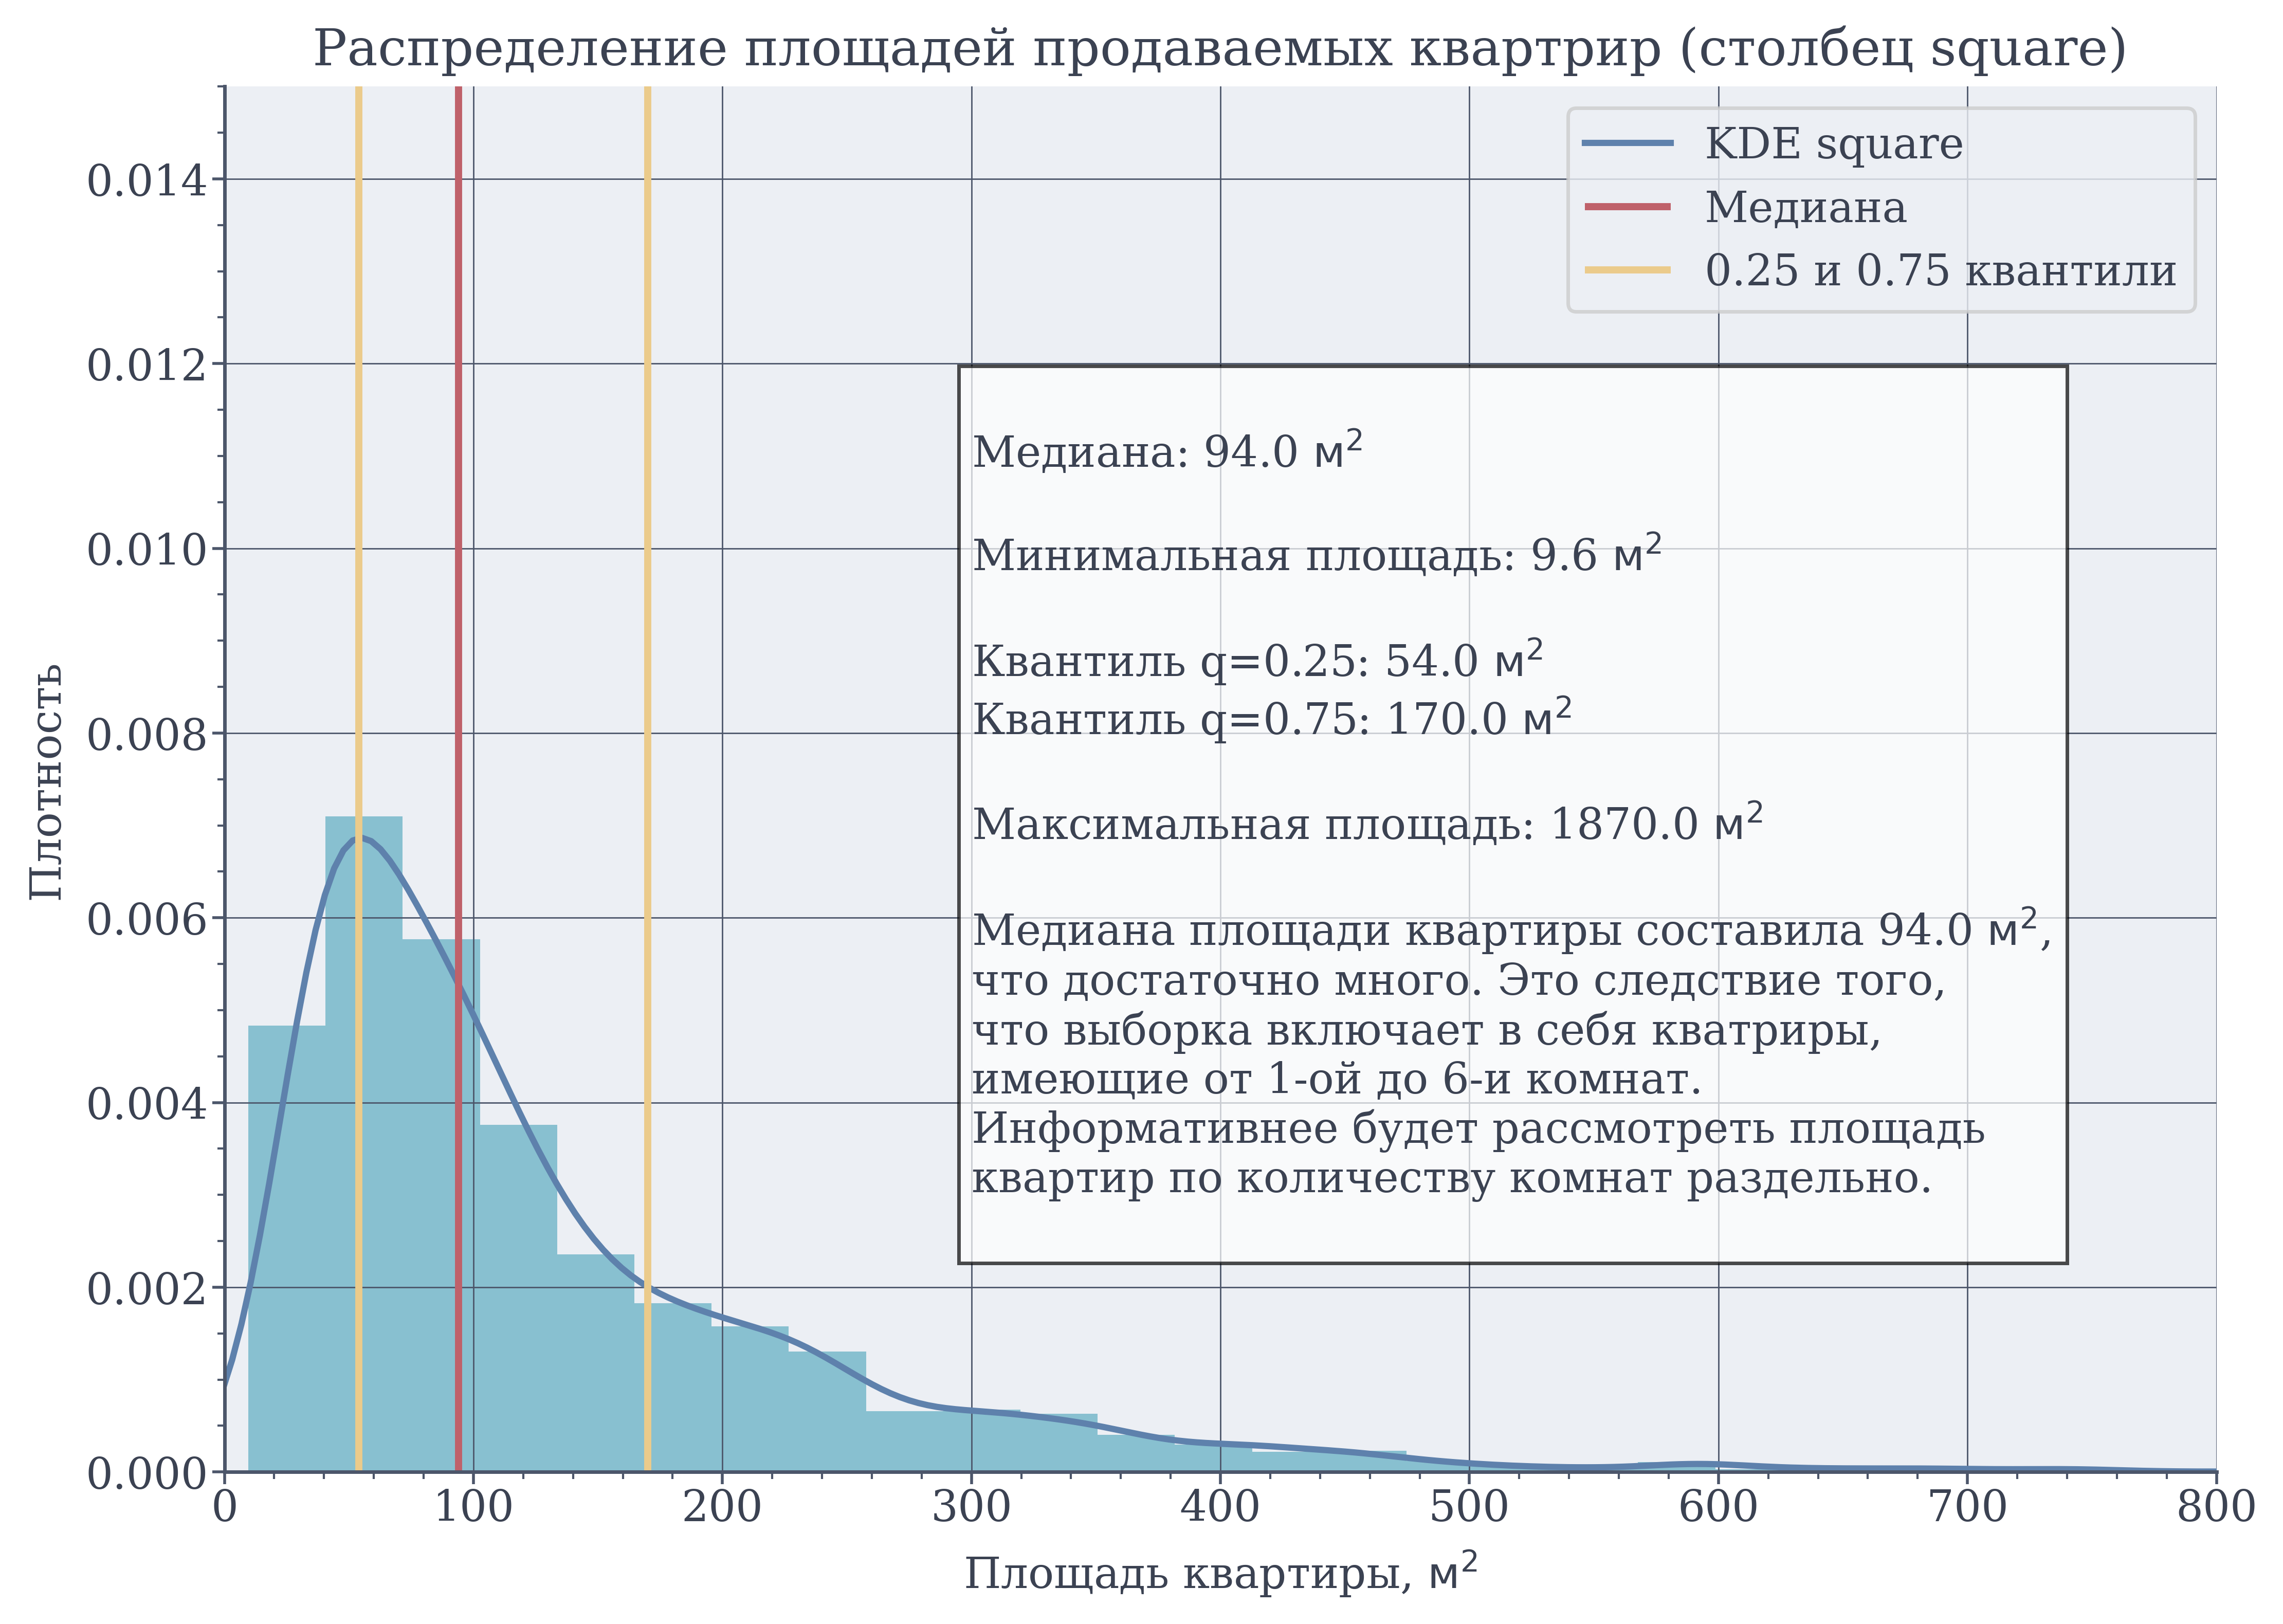

In [14]:
square_description = df_cian["square"].describe(include="all")


m_square = "$\mathrm{м}^2$"
text_for_histplot = f"""
Медиана: {square_description["50%"]} {m_square}

Минимальная площадь: {square_description["min"]} {m_square}

Квантиль q=0.25: {square_description["25%"]} {m_square}
Квантиль q=0.75: {square_description["75%"]} {m_square}

Максимальная площадь: {square_description["max"]} {m_square}
"""
text_for_histplot = text_for_histplot + f"""
Медиана площади квартиры составила {square_description["50%"]} {m_square}, 
что достаточно много. Это следствие того, 
что выборка включает в себя кватриры,
имеющие от 1-ой до 6-и комнат. 
Информативнее будет рассмотреть площадь
квартир по количеству комнат раздельно.
"""

plot_info = {
    "title": "Распределение площадей продаваемых квартрир (столбец square)",
    "xlabel": f"Площадь квартиры, {m_square}",
    "ylabel": "Плотность",
    "text": text_for_histplot,
}

plt.figure(figsize=(10, 7), dpi=500)

plt.hist(
    df_cian["square"],
    bins=60,
    density=True,
    color=custom_pallete["light_gray_blue"],
)
df_cian["square"].plot.kde(color=custom_pallete["blue"], label="KDE square")

plt.vlines(
    x=square_description["50%"],
    ymax=1,
    ymin=0,
    colors=custom_pallete["red"],
    linewidth=2,
    label="Медиана"
)

plt.vlines(
    x=(
        square_description["25%"],
        square_description["75%"],
    ),
    ymax=1,
    ymin=0,
    colors=custom_pallete["yellow"],
    linewidth=2,
    label="0.25 и 0.75 квантили"
)

plt.annotate(
    plot_info["text"],
    xy=(300, 2.5e-3),
    bbox=dict(boxstyle="square", fc="w", alpha=0.7),
    fontsize=12,
)

plt.xlabel(plot_info["xlabel"])
plt.ylabel(plot_info["ylabel"])


plt.xlim(0, 800)
plt.ylim(0, 1.5e-2)

plt.title(plot_info["title"])
plt.legend()

# pdf.savefig(bbox_inches = 'tight')
plt.show()


Данное распределение тоже похоже на логнормальное, собственно по тем же соображениям, что и для цен на квартиры.

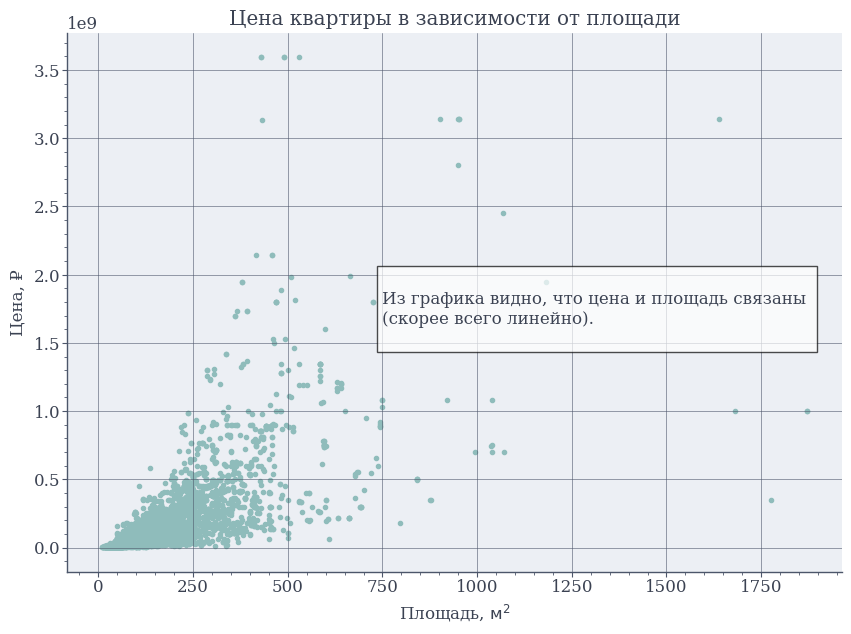

In [15]:
text_for_scatterplot = f"""
Из графика видно, что цена и площадь связаны 
(скорее всего линейно).
"""

plot_info = {
    "title": "Цена квартиры в зависимости от площади",
    "xlabel": "Площадь, $\\mathrm{м}^2$",
    "ylabel": "Цена, ₽",
    "text": text_for_scatterplot,
}

fig, ax = plt.subplots(figsize=(10, 7))  # , dpi=500)


ax.scatter(df_cian["square"], df_cian["price"], s=9)
ax.set(
    title=plot_info["title"],
    xlabel=plot_info["xlabel"],
    ylabel=plot_info["ylabel"],
)

ax.annotate(
    plot_info["text"],
    xy=(750, 1.5e9),
    bbox=dict(boxstyle="square", fc="w", alpha=0.7),
    fontsize=12,
    alpha=1,
)

# pdf.savefig(bbox_inches = 'tight')
plt.show()

Разобъем датасет по количеству комнат и посмотрим на распределение площадей в зависимости от количества комнат.

In [16]:
df_cian_1_room = df_cian[df_cian["room_count"] == 1]
df_cian_2_room = df_cian[df_cian["room_count"] == 2]
df_cian_3_room = df_cian[df_cian["room_count"] == 3]
df_cian_4_room = df_cian[df_cian["room_count"] == 4]
df_cian_5_room = df_cian[df_cian["room_count"] == 5]
df_cian_6_room = df_cian[df_cian["room_count"] == 6]

In [17]:
def histplot_square(
    df_cian_n_room: pd.DataFrame,
    desctiption: str = "",
    bins: int = 50,
    xy: tuple = (0, 0),
    xlim: tuple = (0, 100),
    ylim: tuple = (0, 1),
):
    square_description = df_cian_n_room["square"].describe(include="all")
    m_square = "$\mathrm{м}^2$"
    text_for_histplot = f"""
    Медиана: {square_description["50%"]} {m_square}

    Минимальная площадь: {square_description["min"]} {m_square}

    Квантиль q=0.25: {square_description["25%"]} {m_square}
    Квантиль q=0.75: {square_description["75%"]} {m_square}

    Максимальная площадь: {square_description["max"]} {m_square}
    """
    text_for_histplot = text_for_histplot + desctiption

    plot_info = {
        "title": f"Распределение площадей {df_cian_n_room["room_count"].values[0]}-комн. квартир",
        "xlabel": f"Площадь квартиры, {m_square}",
        "ylabel": "Плотность",
        "text": text_for_histplot,
    }

    plt.figure(figsize=(10, 7), dpi=500)

    plt.hist(
        df_cian_n_room["square"],
        bins=bins,
        density=True,
        color=custom_pallete["light_gray_blue"],
    )
    df_cian_n_room["square"].plot.kde(color=custom_pallete["blue"], label="KDE square")

    plt.vlines(
        x=square_description["50%"],
        ymax=1,
        ymin=0,
        colors=custom_pallete["red"],
        linewidth=2,
        label="Медиана",
    )

    plt.vlines(
        x=(
            square_description["25%"],
            square_description["75%"],
        ),
        ymax=1,
        ymin=0,
        colors=custom_pallete["yellow"],
        linewidth=2,
        label="0.25 и 0.75 квантили",
    )

    plt.annotate(
        plot_info["text"],
        xy=xy,
        bbox=dict(boxstyle="square", fc="w", alpha=0.7),
        fontsize=12,
    )

    plt.xlabel(plot_info["xlabel"])
    plt.ylabel(plot_info["ylabel"])

    plt.xlim(*xlim)
    plt.ylim(*ylim)

    plt.title(plot_info["title"])
    plt.legend()

    # pdf.savefig(bbox_inches = 'tight')
    plt.show()

### 1-комн

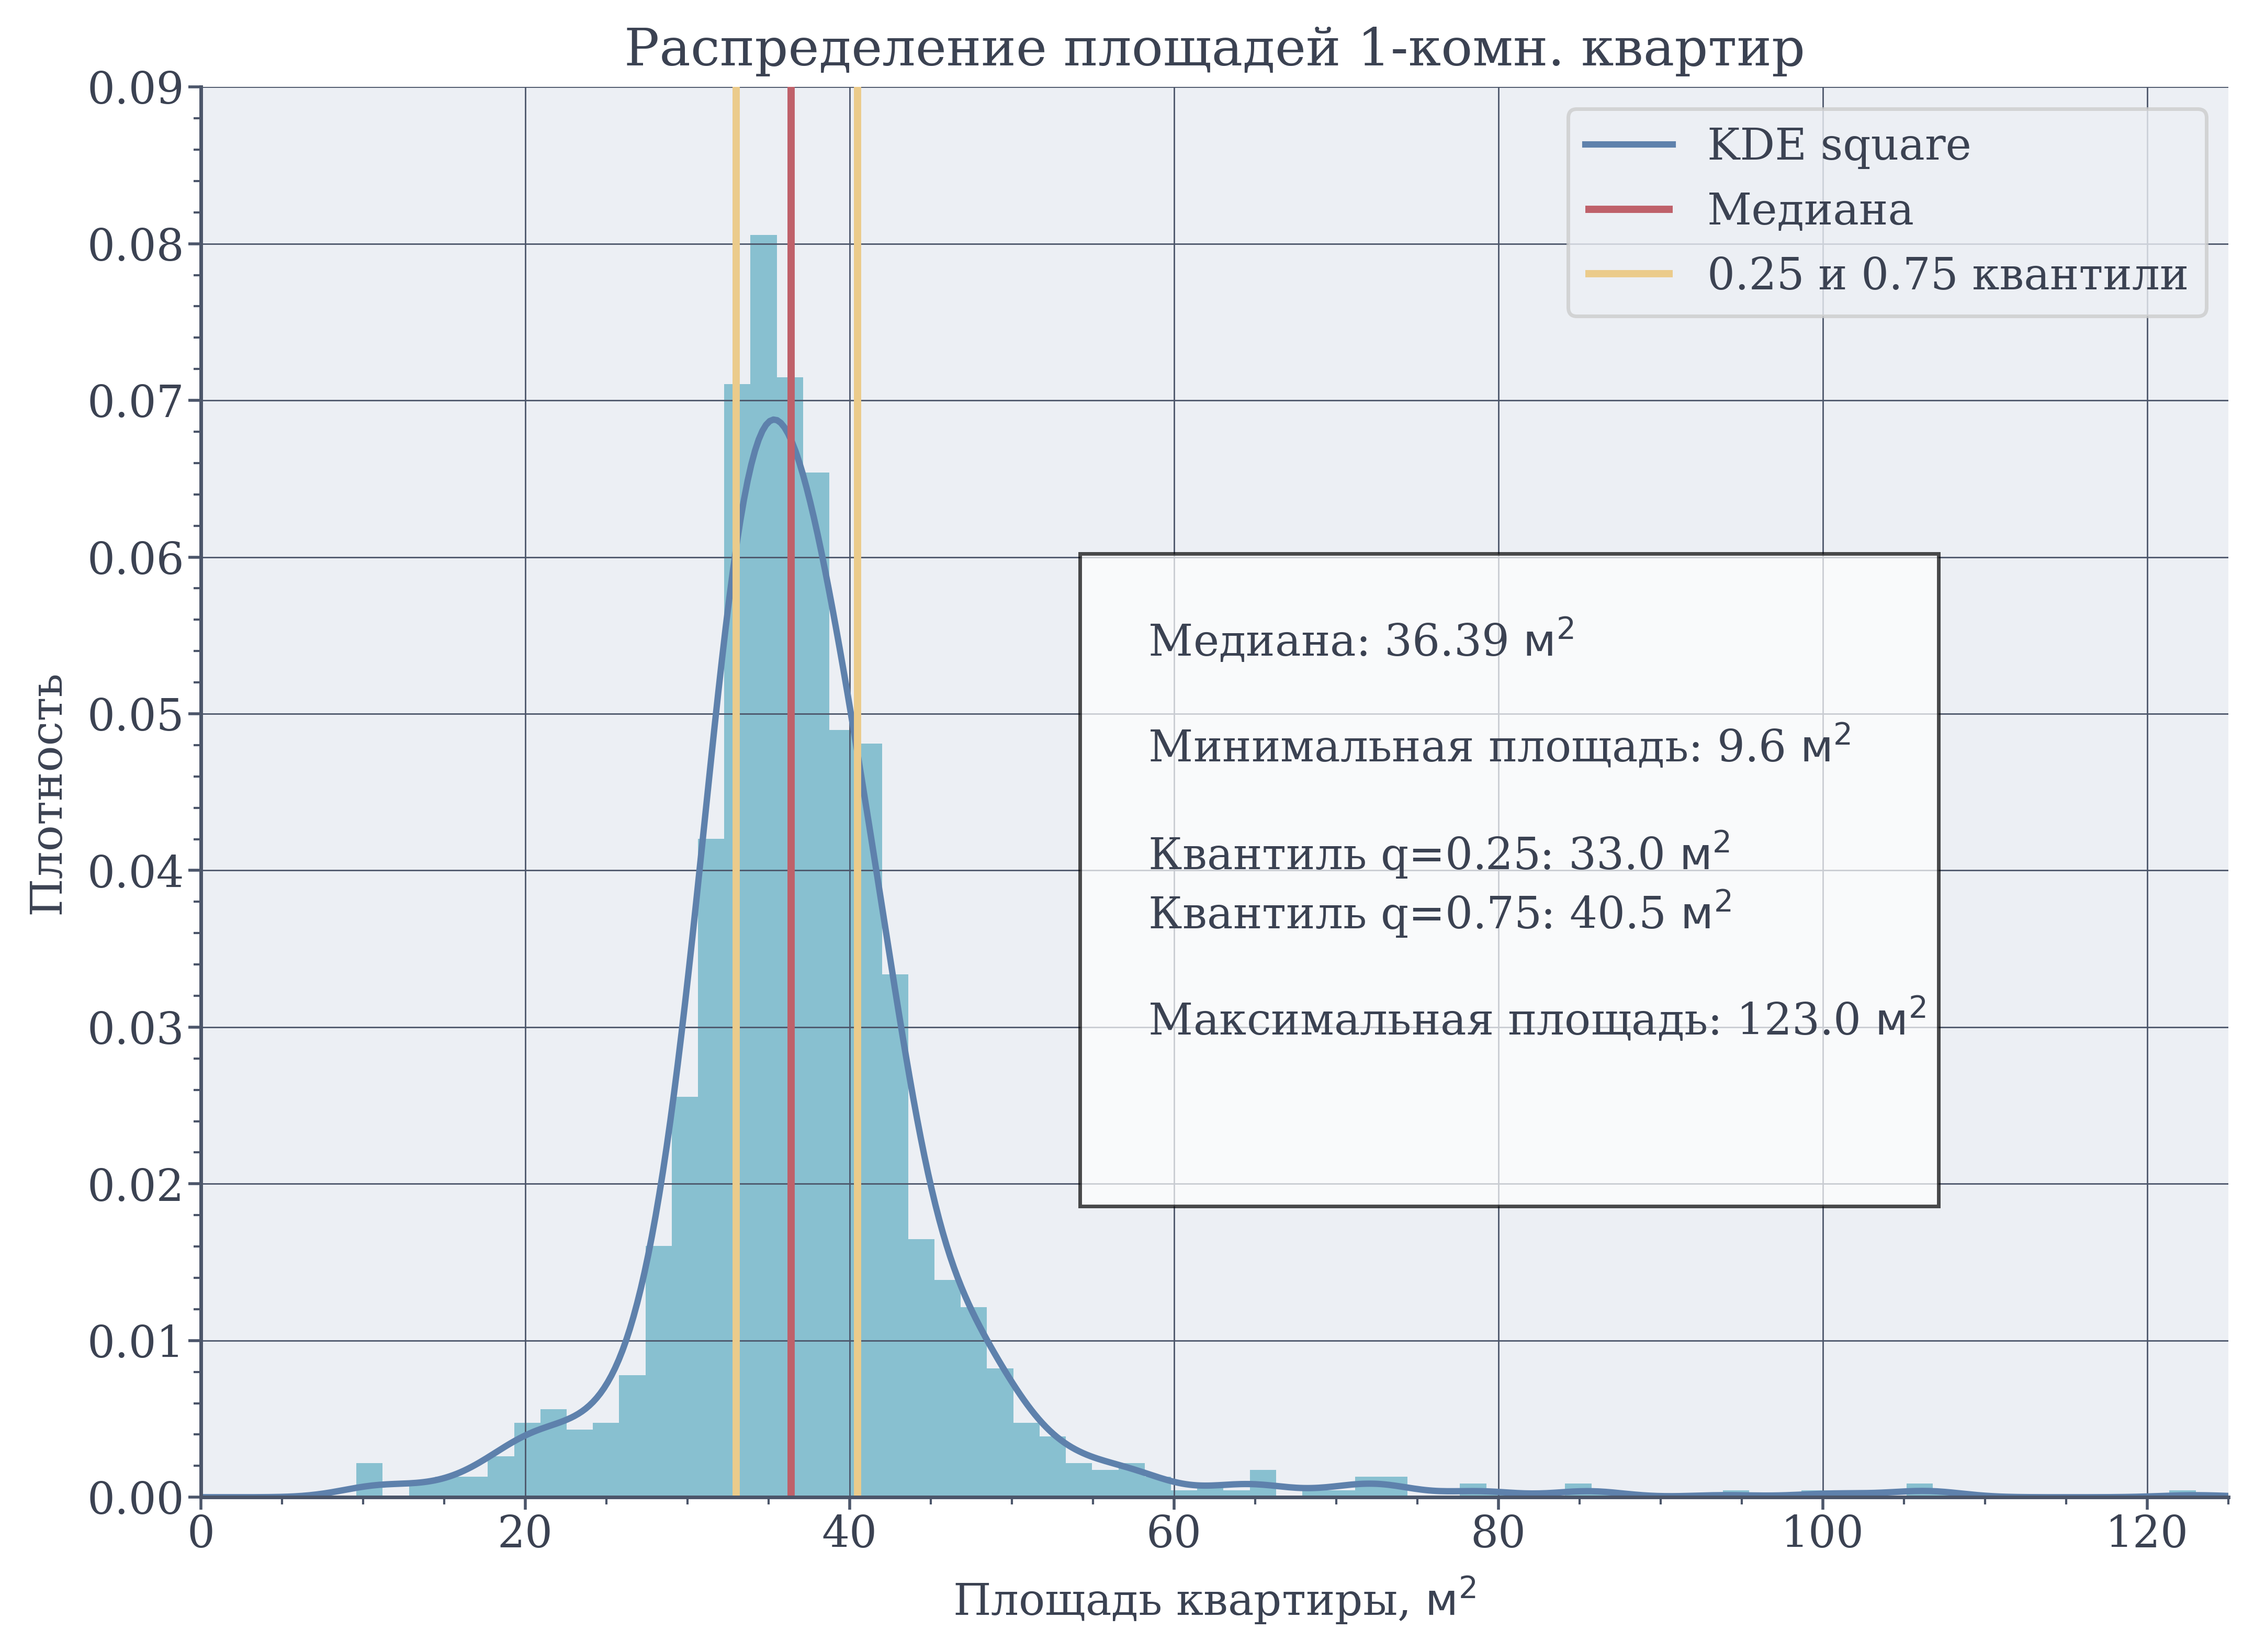

In [18]:
histplot_square(
    df_cian_1_room,
    bins=70,
    xy=(55, 0.02),
    xlim=(0, 125),
    ylim=(0, 0.9e-1),
    desctiption="""
    
    """,
)

### 2-комн

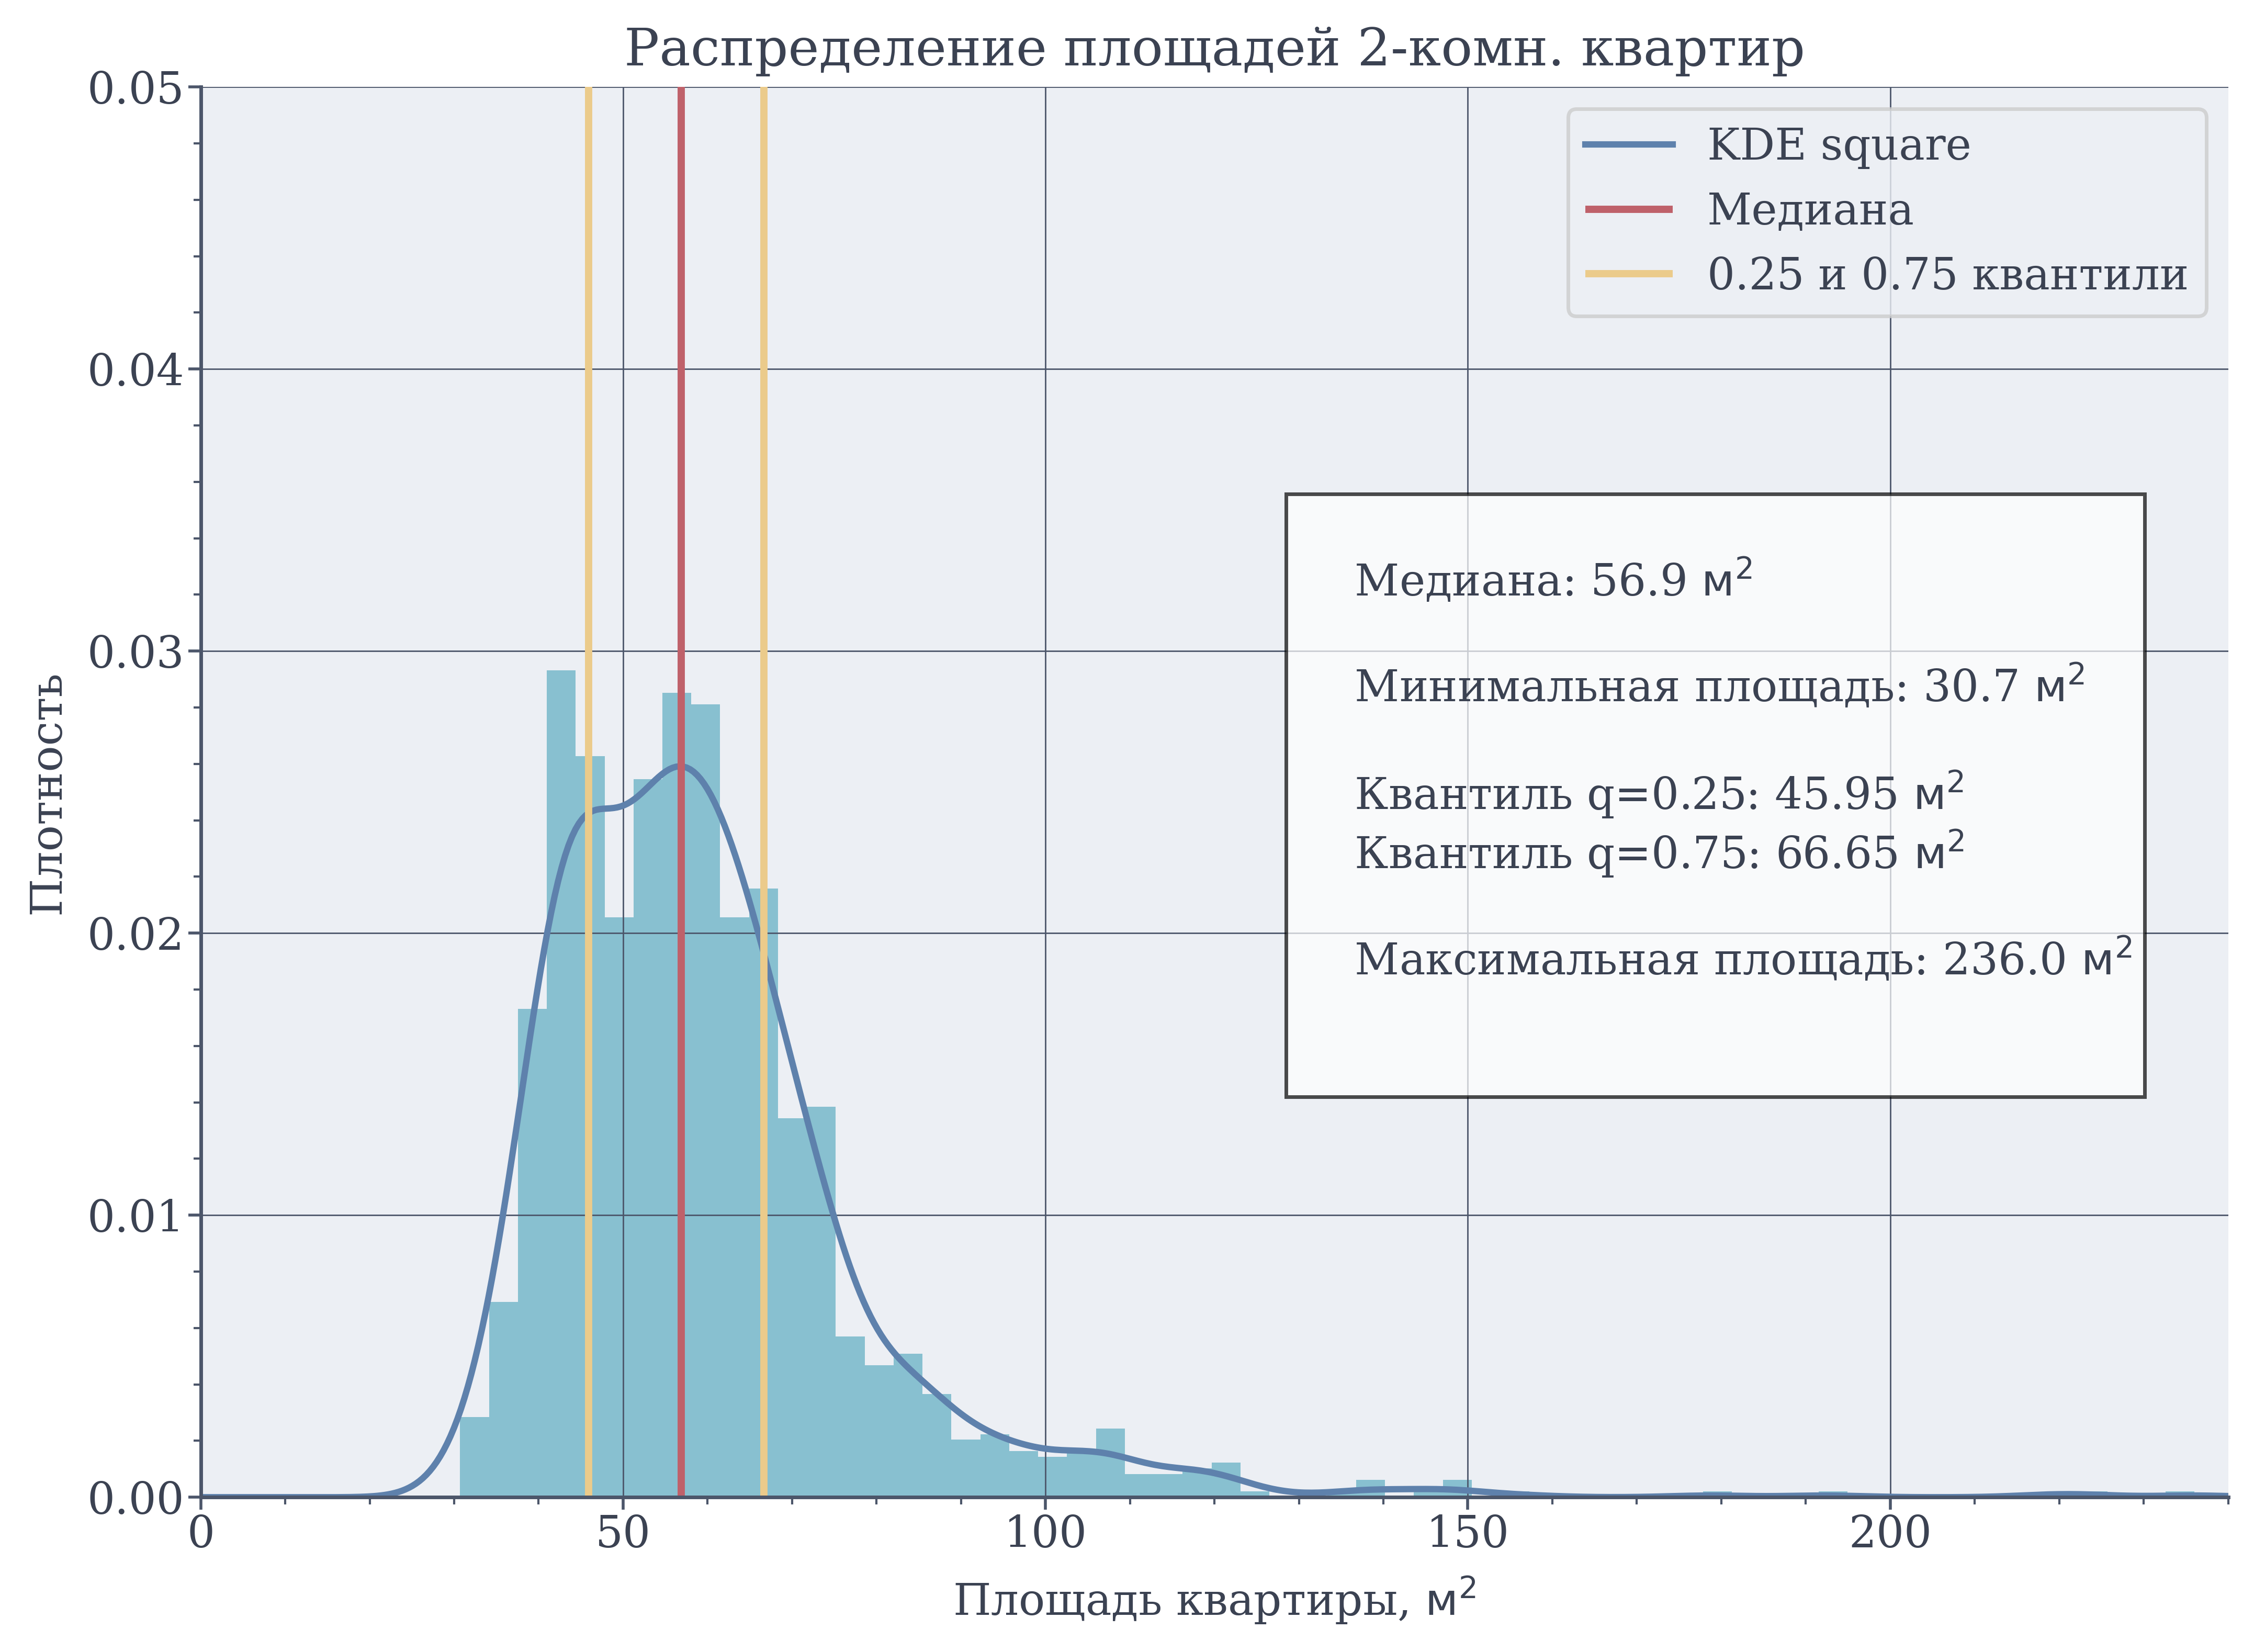

In [19]:
histplot_square(
    df_cian_2_room,
    bins=60,
    xy=(130, 0.015),
    xlim=(0, 240),
    ylim=(0, 0.5e-1),
    desctiption="""
    """,
)

### 3-комн

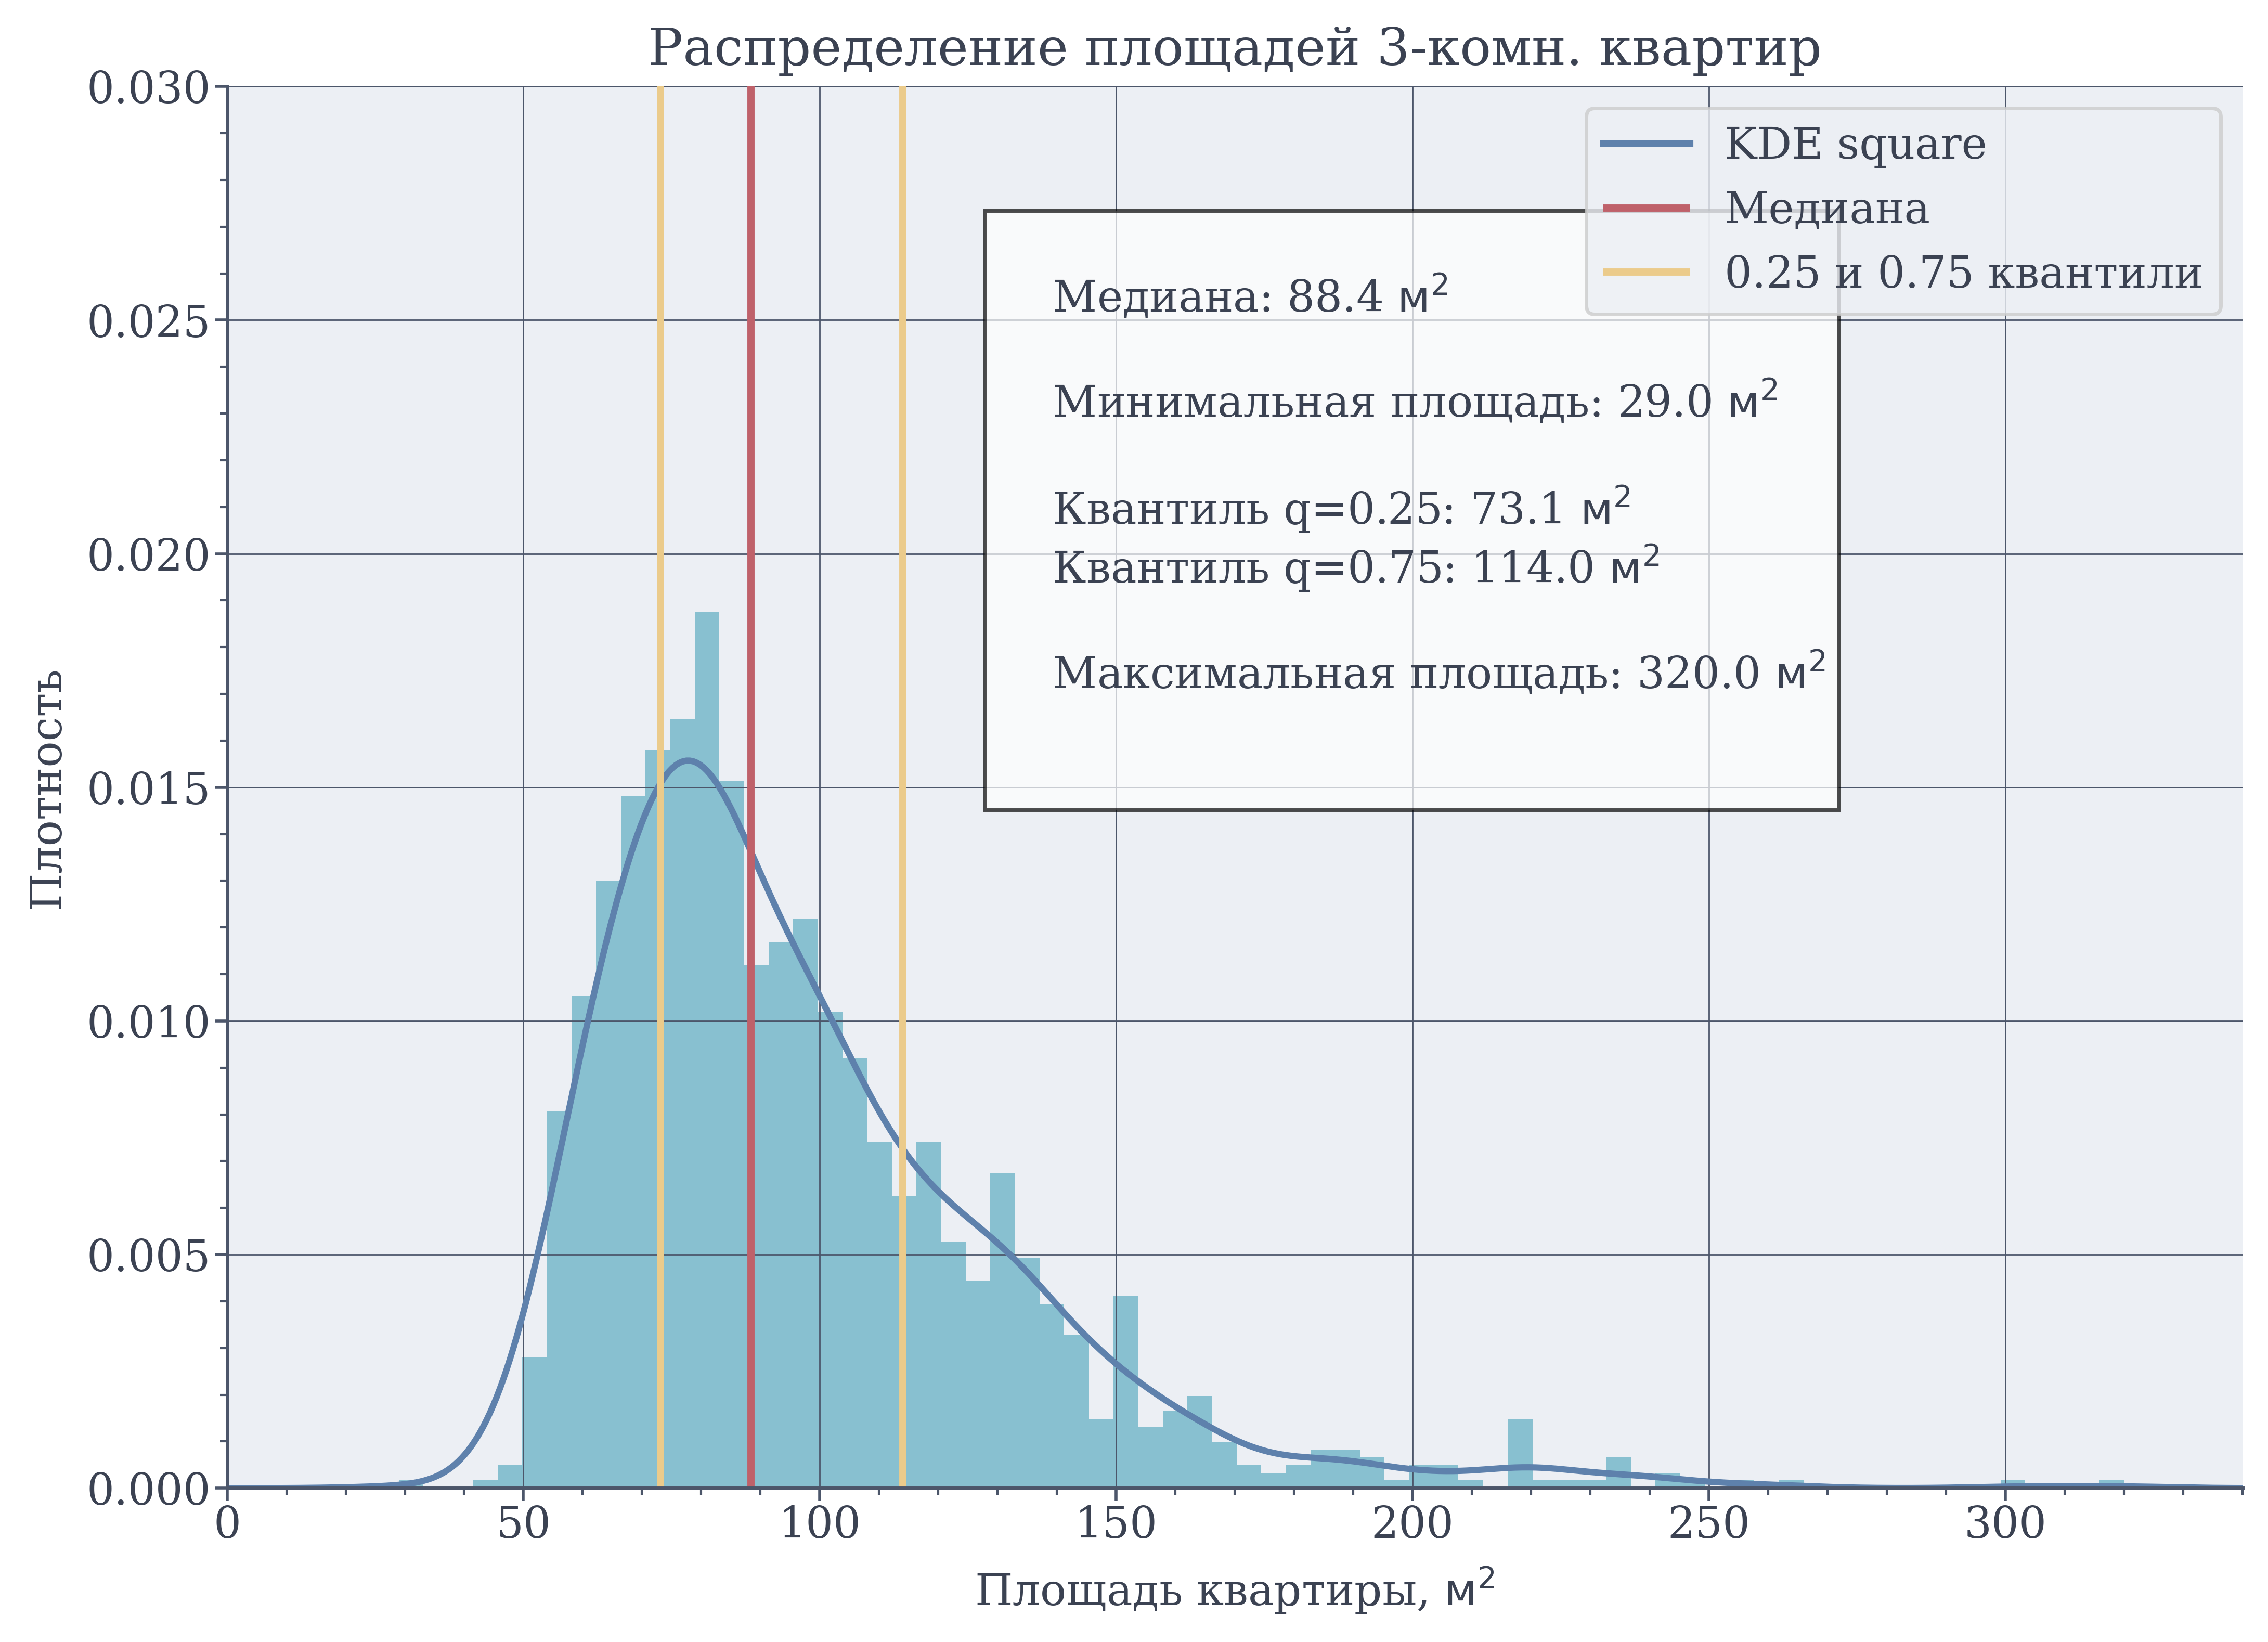

In [20]:
histplot_square(
    df_cian_3_room,
    bins=70,
    xy=(130, 0.015),
    xlim=(0, 340),
    ylim=(0, 0.3e-1),
    desctiption="""
    """,
)

### 4-комн

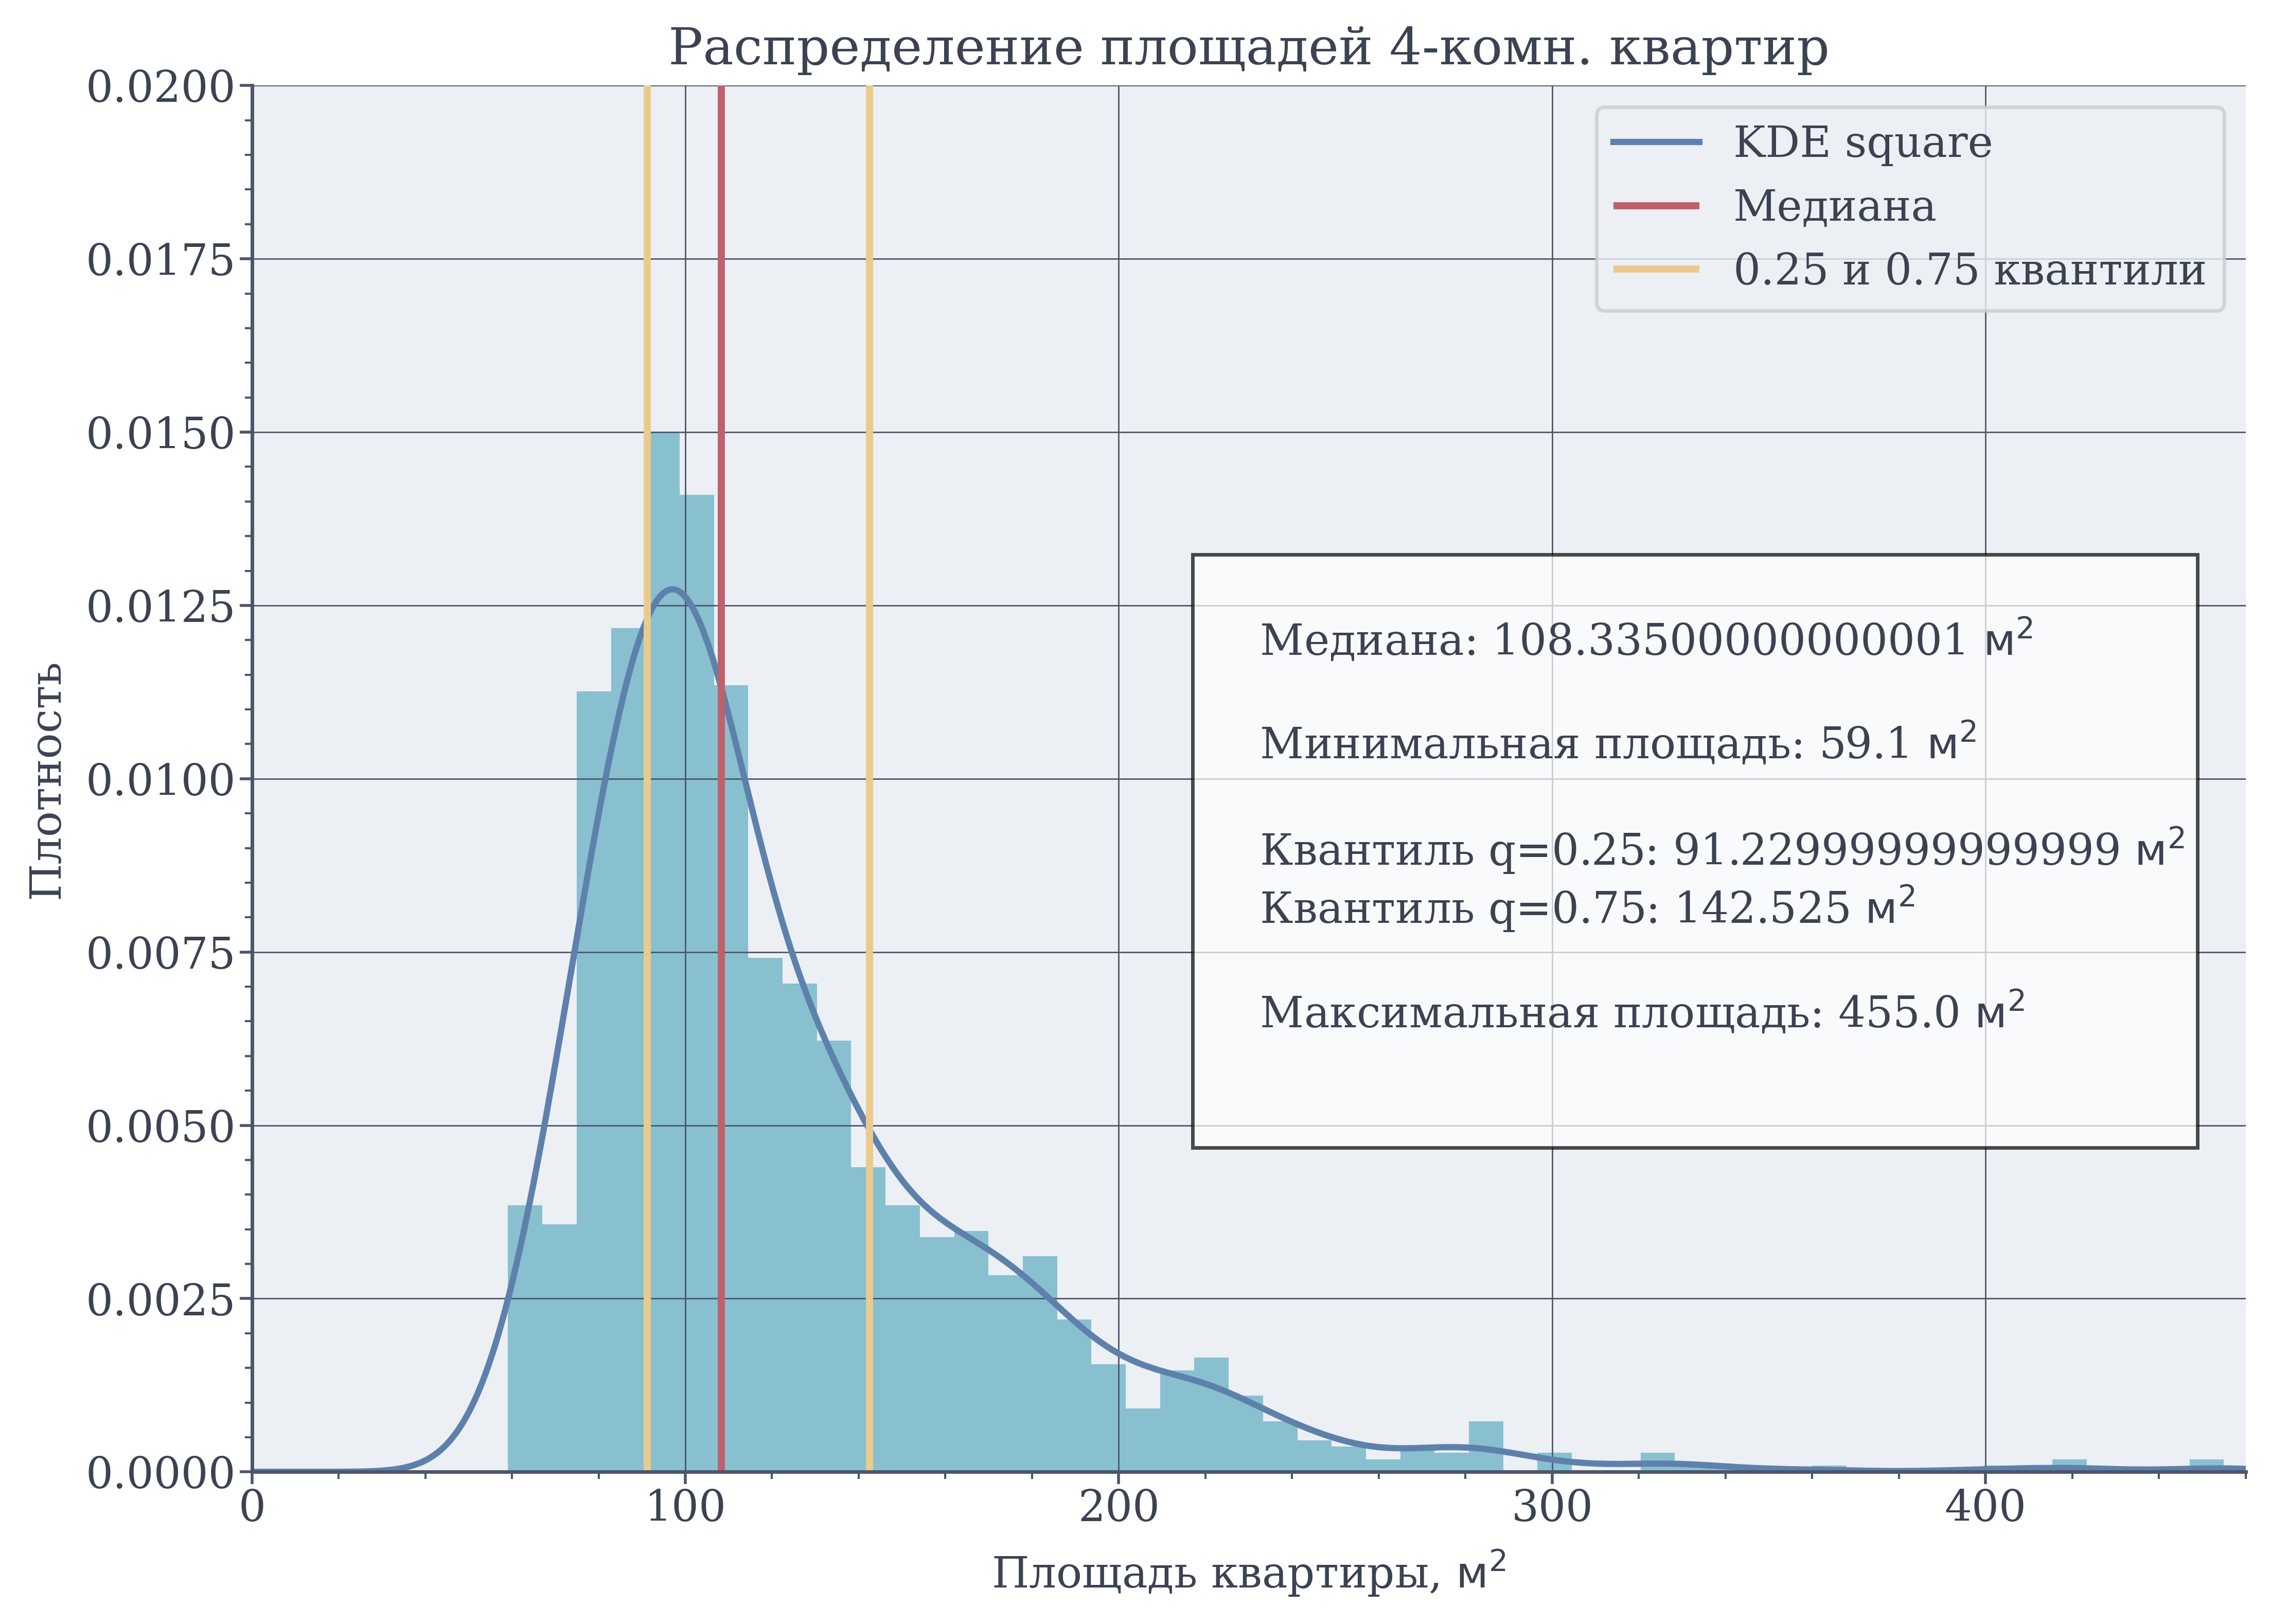

In [21]:
histplot_square(
    df_cian_4_room,
    bins=50,
    xy=(220, 0.005),
    xlim=(0, 460),
    ylim=(0, 0.2e-1),
    desctiption="""
    """,
)

### 5-комн

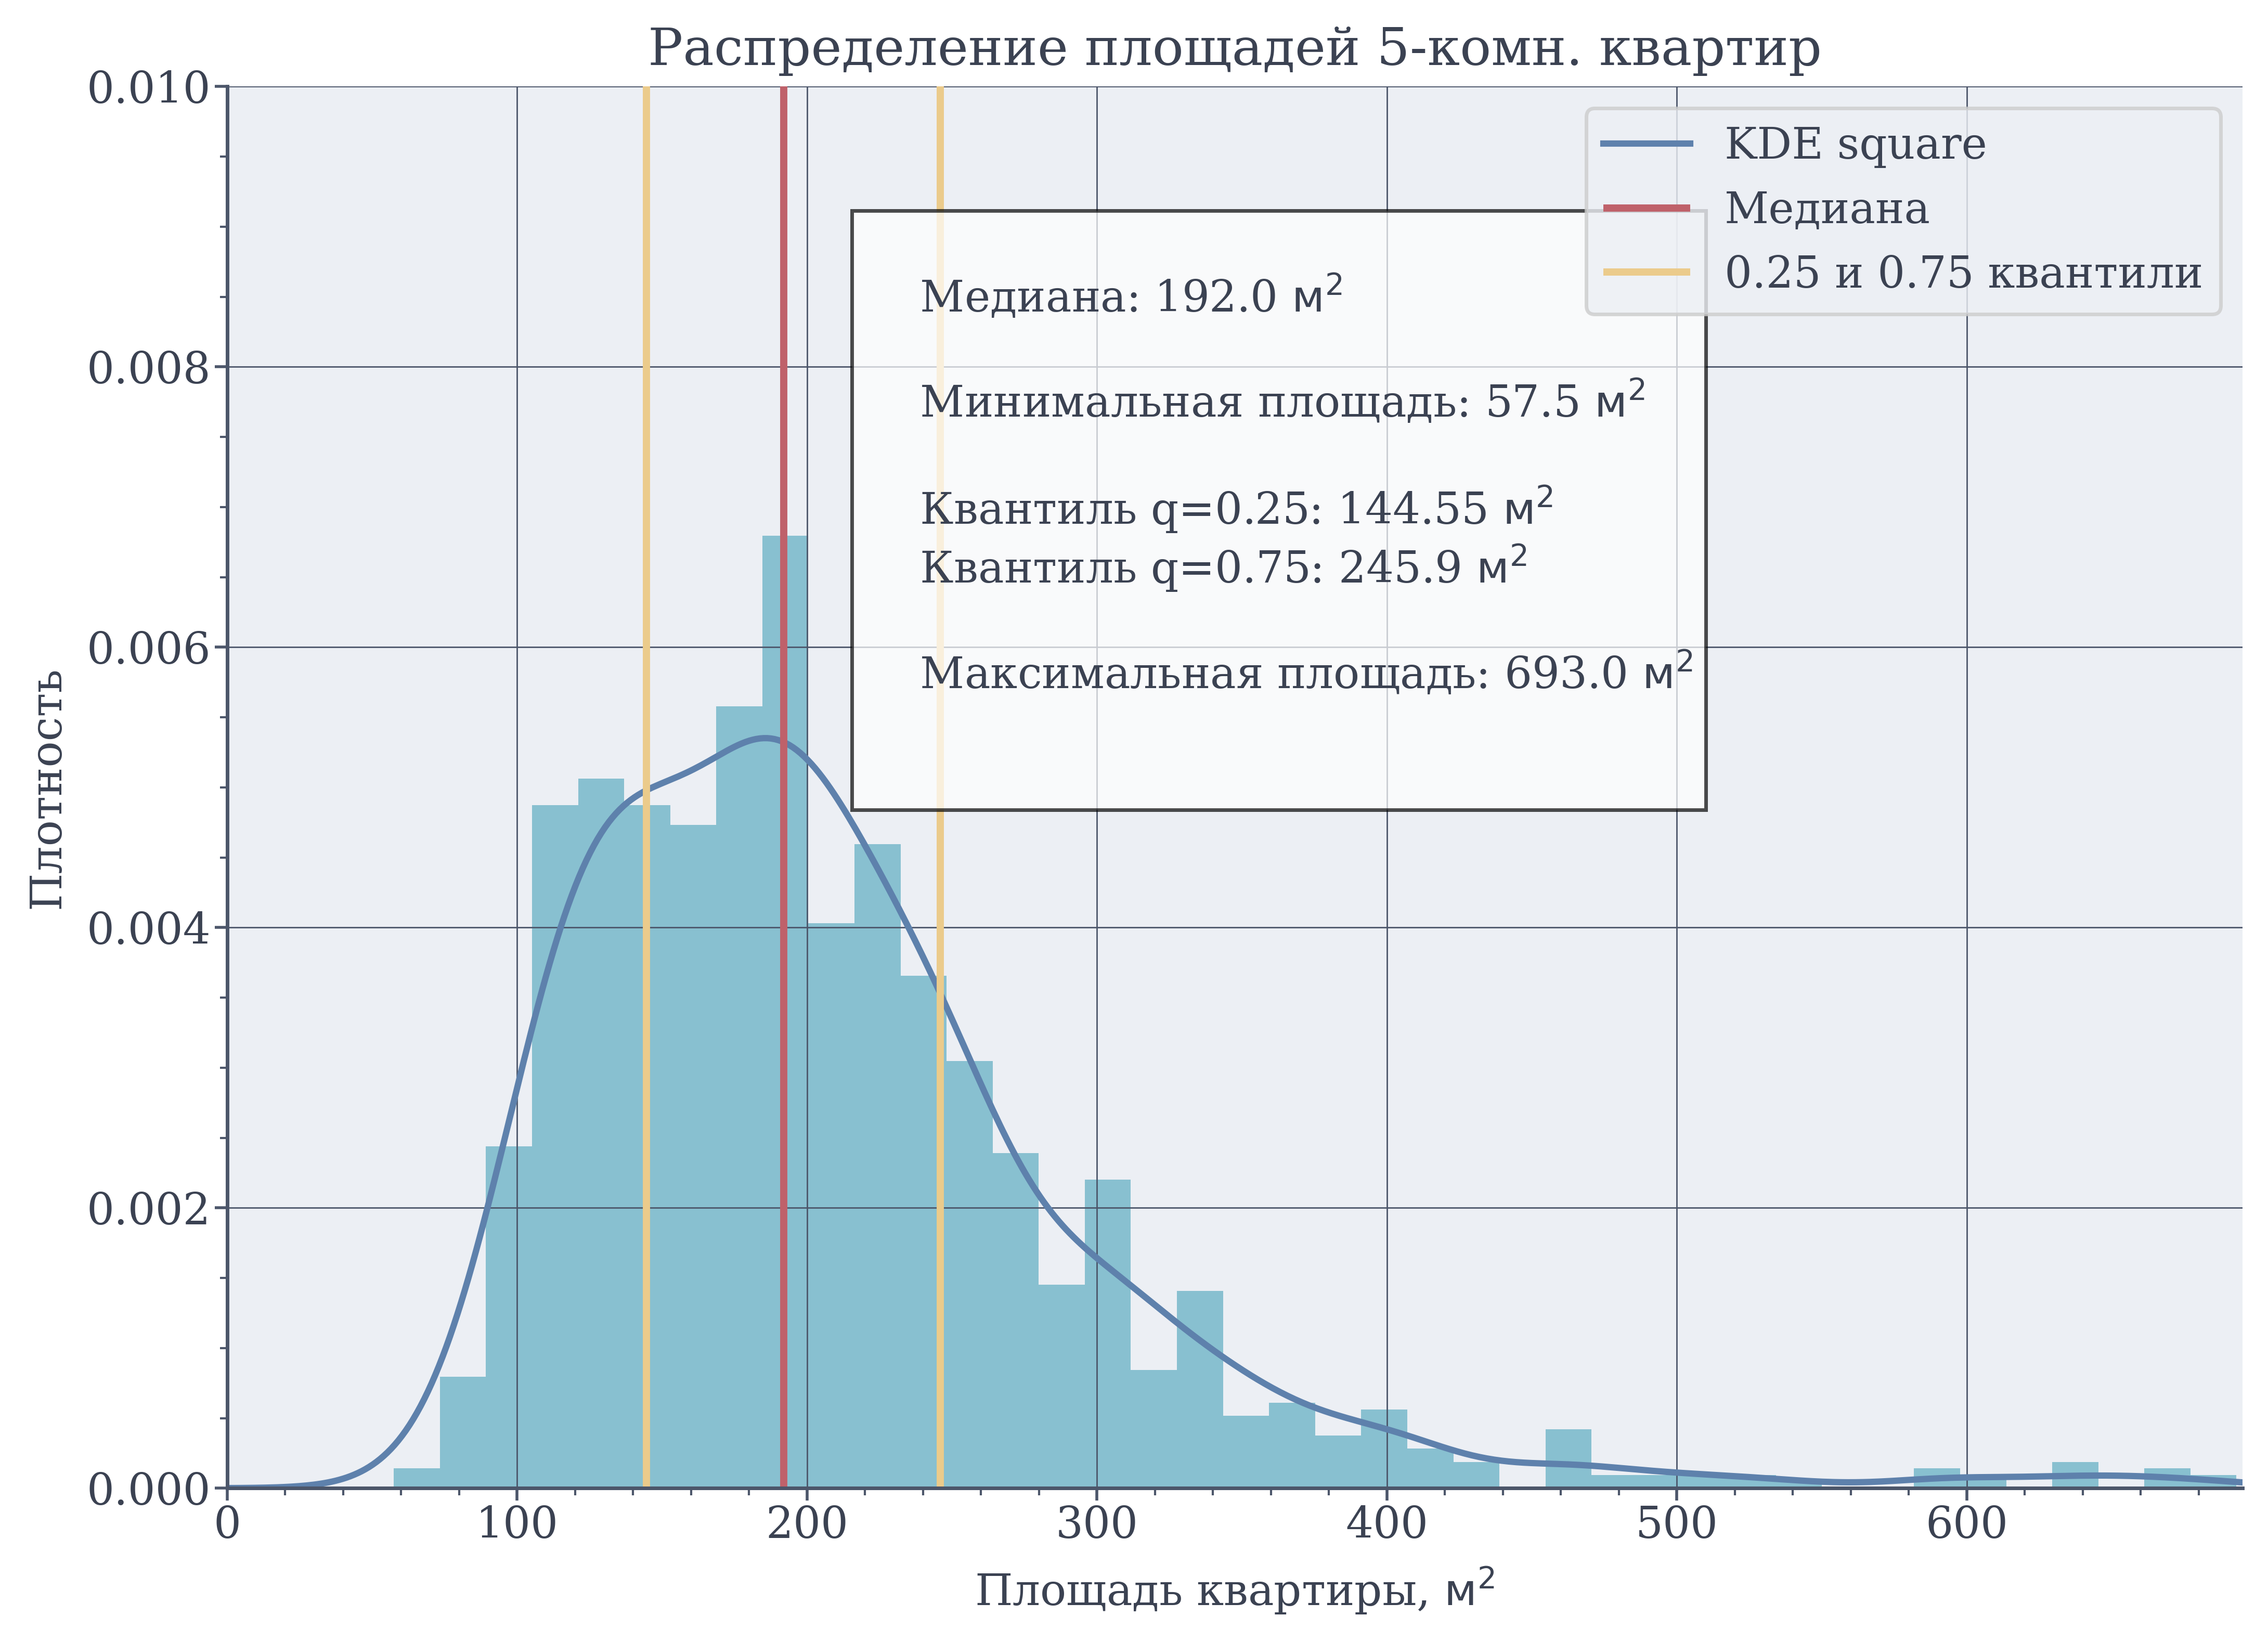

In [22]:
histplot_square(
    df_cian_5_room,
    bins=40,
    xy=(220, 0.005),
    xlim=(0, 695),
    ylim=(0, 0.1e-1),
    desctiption="""
    """,
)

### 6-комн

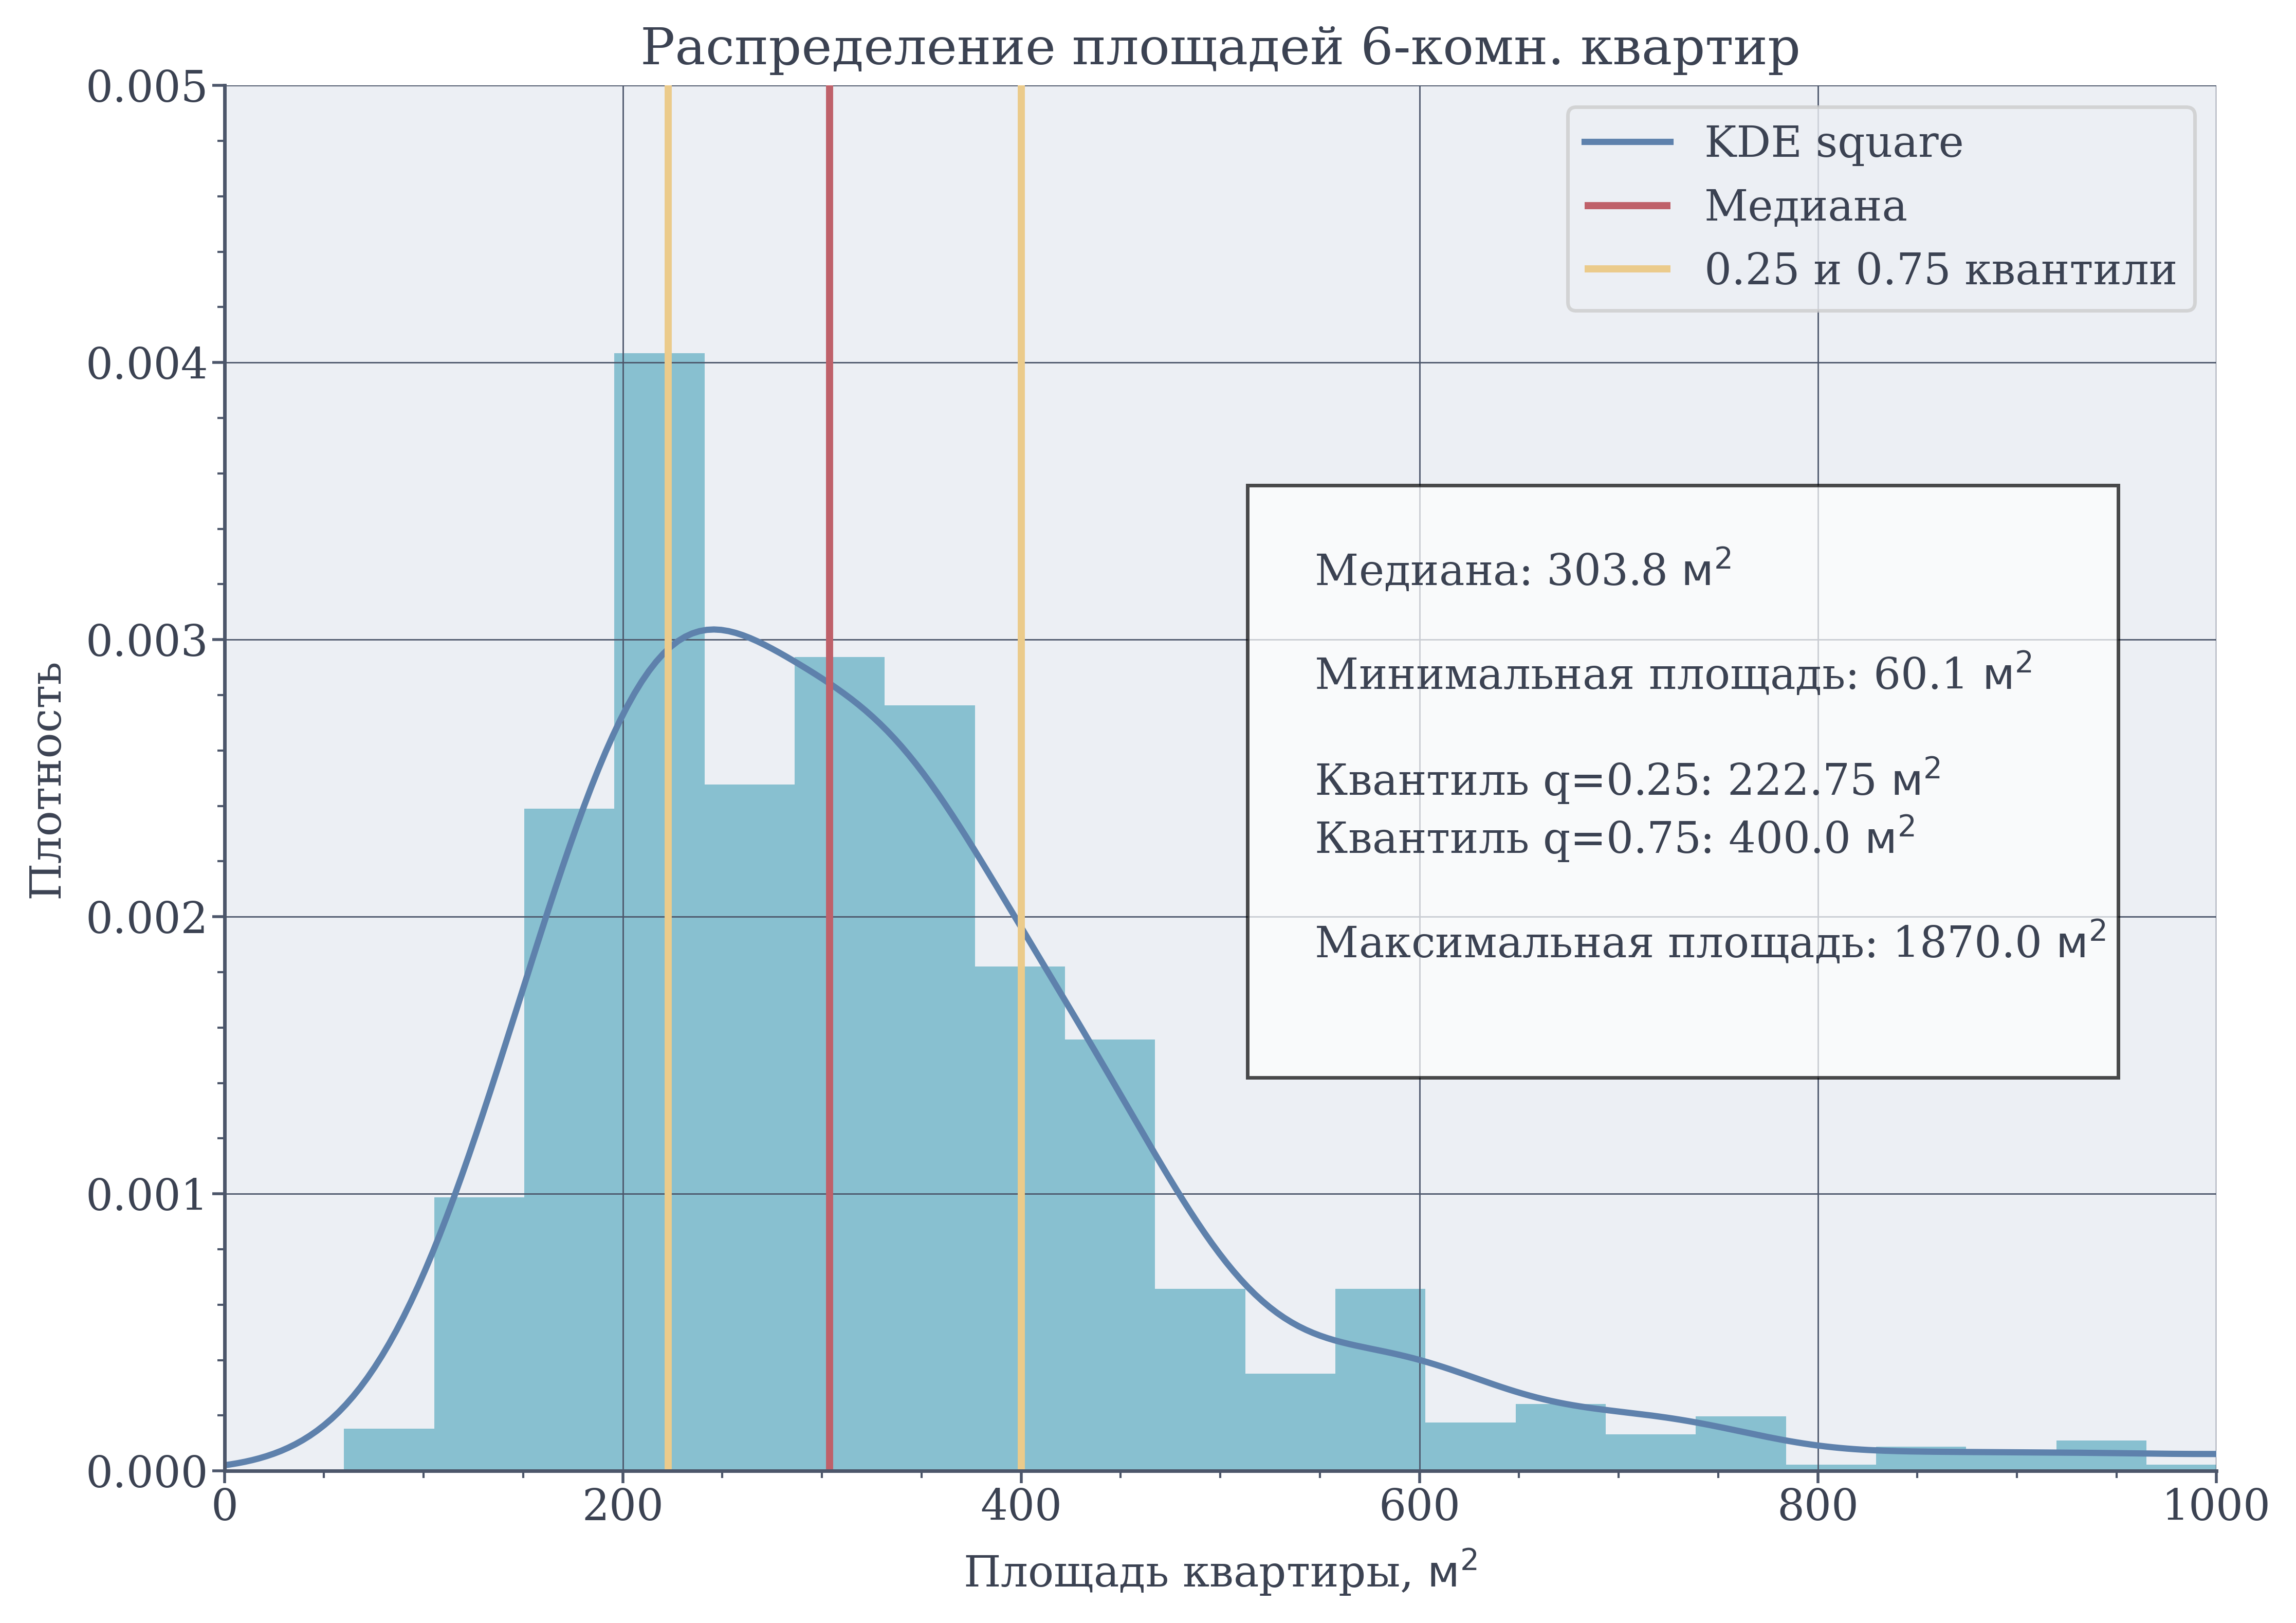

In [23]:
histplot_square(
    df_cian_6_room,
    bins=40,
    xy=(520, 0.0015),
    xlim=(0, 1000),
    ylim=(0, 0.05e-1),
    desctiption="""
    """,
)

Попробуем получить соотношения  

In [24]:
df_cian["square"] = df_cian["square"].apply(float)

In [25]:
numerical_features

['price', 'geo_lat', 'geo_lng', 'floor', 'floor_count', 'square', 'room_count']

In [26]:
tmp = df_cian[df_cian["living_square"] != "unknown"][["square", "living_square", "room_count"]]
tmp["lsqr/sqr"] = tmp["living_square"].apply(float) / tmp["square"]
tmp = tmp.groupby(by="room_count", as_index=False).agg({"lsqr/sqr": "mean"})
tmp

room_count  lsqr/sqr
0           1  0.476982
1           2  0.549417
2           3  0.592057
3           4  0.589595
4           5  0.623578
5           6  0.645722

In [27]:
tmp = df_cian.merge(tmp, on="room_count")
tmp.loc[tmp["living_square"] == "unknown", "living_square"] = tmp["square"] * tmp["lsqr/sqr"]
tmp["living_square"] = tmp["living_square"].apply(lambda x: round(float(x), 2))
df_cian["living_square"] = tmp["living_square"]

In [28]:
tmp = df_cian[df_cian["kitchen_square"] != "unknown"][["square", "kitchen_square", "room_count"]]
tmp["ksqr/sqr"] = tmp["kitchen_square"].apply(float) / tmp["square"]
tmp = tmp.groupby(by="room_count", as_index=False).agg({"ksqr/sqr": "mean"})
tmp

room_count  ksqr/sqr
0           1  0.262817
1           2  0.211080
2           3  0.170644
3           4  0.160629
4           5  0.120957
5           6  0.095732

In [29]:
tmp = df_cian.merge(tmp, on="room_count")
tmp.loc[tmp["kitchen_square"] == "unknown", "kitchen_square"] = tmp["square"] * tmp["ksqr/sqr"]
tmp["kitchen_square"] = tmp["kitchen_square"].apply(lambda x: round(float(x), 2))
df_cian["kitchen_square"] = tmp["kitchen_square"]

In [30]:
df_cian

price                                           location  \
0       18374400  Москва, СВАО, р-н Марьина роща, Тэйт жилой ком...   
1       49954800  Москва, ЦАО, р-н Таганский, Славянская пл., 2/5с1   
2        8170000  Москва, НАО (Новомосковский), Филимонковское п...   
3       20206500  Москва, СВАО, р-н Останкинский, ул. Годовикова...   
4       17119620  Москва, ЮАО, р-н Даниловский, Автозаводская ул...   
...          ...                                                ...   
8048   987184440  Москва, ЦАО, р-н Пресненский, Большая Никитска...   
8049   186000000          Москва, ЦАО, р-н Тверской, ул. Ильинка, 4   
8050  2455020000  Москва, ЦАО, р-н Тверской, 1-я Тверская-Ямская...   
8051  1796450000  Москва, ЦАО, р-н Хамовники, Пречистенская наб....   
8052  2147483647  Москва, ЦАО, р-н Якиманка, Лаврушинский жилой ...   

        geo_lat    geo_lng              metro  floor  floor_count   square  \
0     55.802530  37.620945       Марьина Роща     34           49    38.28   
1     55.752541  37.635727              Китай      7            8    53.20   
2     55.552637  37.337172        Филатов Луг      2            5    31.00   
3     55.810466  37.624247       Алексеевская     34           37    28.50   
4     55.706597  37.632285           Тульская      6           20    38.82   
...         ...        ...                ...    ...          ...      ...   
8048  55.756153  37.606640          Арбатская      3            5   235.40   
8049  55.753625  37.625873  Площадь Революции      4            4   336.40   
8050  55.771088  37.594868         Маяковская      9            9  1067.40   
8051  55.739732  37.605508      Кропоткинская      5            7   724.00   
8052  55.739757  37.620949      Третьяковская      7            8   459.40   

      living_square  kitchen_square  ... ceiling_height             view  \
0             11.80           10.06  ...           3.12          unknown   
1             25.38           24.10  ...            3.0          unknown   
2             14.79           10.00  ...            3.0          Во двор   
3             21.40            7.49  ...           3.01         На улицу   
4             10.60           18.60  ...           2.85          Во двор   
...             ...             ...  ...            ...              ...   
8048         122.00           16.80  ...            3.0  На улицу и двор   
8049         222.50           26.00  ...            3.0  На улицу и двор   
8050         689.24          102.18  ...        unknown          Во двор   
8051         627.00           25.00  ...            3.1  На улицу и двор   
8052         173.30           81.40  ...           3.35          Во двор   

               house_type               heating breakdown  parking  \
0     Монолитно-кирпичный               unknown   unknown  unknown   
1     Монолитно-кирпичный               unknown   unknown  unknown   
2                 unknown        Нет информации       Нет  unknown   
3     Монолитно-кирпичный               unknown   unknown  unknown   
4              Монолитный               unknown   unknown  unknown   
...                   ...                   ...       ...      ...   
8048           Монолитный               unknown   unknown  unknown   
8049            Кирпичный               unknown   unknown  unknown   
8050           Монолитный               unknown   unknown  unknown   
8051            Кирпичный  Автономная котельная       Нет  unknown   
8052           Монолитный               unknown   unknown  unknown   

              accomodation_type                 author  \
0                   Новостройка                КОРТРОС   
1        Вторичка / Апартаменты                unknown   
2                      Вторичка                unknown   
3                   Новостройка                КОРТРОС   
4                   Новостройка                unknown   
...                         ...                    ...   
8048                Новостройка  Intermark Real Estate   
804

In [31]:
df_cian.loc[df_cian["ceiling_height"] == "unknown", "ceiling_height"] = np.mean(
    df_cian[df_cian["ceiling_height"] != "unknown"]["ceiling_height"]
    .apply(lambda x: round(float(x), 2))
    .values
)

In [50]:
df_cian

price                                           location  \
0       18374400  Москва, СВАО, р-н Марьина роща, Тэйт жилой ком...   
1       49954800  Москва, ЦАО, р-н Таганский, Славянская пл., 2/5с1   
2        8170000  Москва, НАО (Новомосковский), Филимонковское п...   
3       20206500  Москва, СВАО, р-н Останкинский, ул. Годовикова...   
4       17119620  Москва, ЮАО, р-н Даниловский, Автозаводская ул...   
...          ...                                                ...   
8048   987184440  Москва, ЦАО, р-н Пресненский, Большая Никитска...   
8049   186000000          Москва, ЦАО, р-н Тверской, ул. Ильинка, 4   
8050  2455020000  Москва, ЦАО, р-н Тверской, 1-я Тверская-Ямская...   
8051  1796450000  Москва, ЦАО, р-н Хамовники, Пречистенская наб....   
8052  2147483647  Москва, ЦАО, р-н Якиманка, Лаврушинский жилой ...   

        geo_lat    geo_lng              metro  floor  floor_count   square  \
0     55.802530  37.620945       Марьина Роща     34           49    38.28   
1     55.752541  37.635727              Китай      7            8    53.20   
2     55.552637  37.337172        Филатов Луг      2            5    31.00   
3     55.810466  37.624247       Алексеевская     34           37    28.50   
4     55.706597  37.632285           Тульская      6           20    38.82   
...         ...        ...                ...    ...          ...      ...   
8048  55.756153  37.606640          Арбатская      3            5   235.40   
8049  55.753625  37.625873  Площадь Революции      4            4   336.40   
8050  55.771088  37.594868         Маяковская      9            9  1067.40   
8051  55.739732  37.605508      Кропоткинская      5            7   724.00   
8052  55.739757  37.620949      Третьяковская      7            8   459.40   

      living_square  kitchen_square  ... ceiling_height             view  \
0             11.80           10.06  ...           3.12          unknown   
1             25.38           24.10  ...            3.0          unknown   
2             14.79           10.00  ...            3.0          Во двор   
3             21.40            7.49  ...           3.01         На улицу   
4             10.60           18.60  ...           2.85          Во двор   
...             ...             ...  ...            ...              ...   
8048         122.00           16.80  ...            3.0  На улицу и двор   
8049         222.50           26.00  ...            3.0  На улицу и двор   
8050         689.24          102.18  ...       3.106925          Во двор   
8051         627.00           25.00  ...            3.1  На улицу и двор   
8052         173.30           81.40  ...           3.35          Во двор   

               house_type               heating breakdown  parking  \
0     Монолитно-кирпичный               unknown   unknown  unknown   
1     Монолитно-кирпичный               unknown   unknown  unknown   
2                 unknown        Нет информации       Нет  unknown   
3     Монолитно-кирпичный               unknown   unknown  unknown   
4              Монолитный               unknown   unknown  unknown   
...                   ...                   ...       ...      ...   
8048           Монолитный               unknown   unknown  unknown   
8049            Кирпичный               unknown   unknown  unknown   
8050           Монолитный               unknown   unknown  unknown   
8051            Кирпичный  Автономная котельная       Нет  unknown   
8052           Монолитный               unknown   unknown  unknown   

              accomodation_type                 author  \
0                   Новостройка                КОРТРОС   
1        Вторичка / Апартаменты                unknown   
2                      Вторичка                unknown   
3                   Новостройка                КОРТРОС   
4                   Новостройка                unknown   
...                         ...                    ...   
8048                Новостройка  Intermark Real Estate   
804